In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                              fit_autocorrelation_v2,
                              check_continuous_time
                             )

In [2]:
%pdb

Automatic pdb calling has been turned ON


In [16]:
PROTEIN_SIZE = 1200
DELTA_T = 0.02174573
# DELTA_T = 3.96

In [30]:
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/02-Pierre/Bleaching_correction/"
files = [
    "DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv", 
    "DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_track.csv",
    "DUP_Sun_100x1400_30-488_20msec_AFAP_190_t6_track.csv",
    "DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_track.csv",
        ]

# path = "/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/03-Dropbox/"
# files = [
#     "Track stats.csv", 
# ]


# Single track analysis

In [37]:
datas = read_csv_file(path+files[3])
datas.groupby('TRACK_ID').max()['FRAME'] - datas.groupby('TRACK_ID').min()['FRAME']

TRACK_ID
31       112
35       119
39        99
47       100
59       110
76       139
96       121
132      105
316      111
508      101
750       95
793      140
1429     102
1489      99
1746     109
1755      99
1775     128
1817      98
2192     102
2731      96
2739     100
3073     148
3170     113
3380     100
4060     101
4128     132
4493     108
4658     171
4915     115
5914     135
6087      94
6413      95
6590      96
6950     120
7076     109
7321     109
7340     135
7360     116
7800     103
8125     101
8351     117
8388     113
9193     115
9746     112
10073     99
Name: FRAME, dtype: int64

In [19]:
print(np.unique(datas.TRACK_ID))
datas.head()

[   7   10   11   16   19  710 1129 1512 1754 2092 2881 3021 3108 5471
 5756 6350 6495 6592 8010 9353]


LABEL       ID  TRACK_ID             QUALITY  POSITION_X  POSITION_Y  \
3  ID1624090  1624090         7   32.98528289794922  104.306691    3.588296   
4  ID1619484  1619484         7   47.31630325317383  104.058129    2.905012   
5  ID1628189  1628189         7   26.59096908569336  104.902283    3.687999   
6  ID1626142  1626142         7  19.401737213134766  104.424780    3.720573   
7  ID1621520  1621520         7   27.01835823059082  104.064340    3.133814   

  POSITION_Z  POSITION_T  FRAME RADIUS VISIBILITY  MEAN_INTENSITY_CH1  \
3        0.0    1.957116     90    0.5          1         1054.621622   
4        0.0    0.326186     15    0.5          1         1105.027027   
5        0.0    4.131689    190    0.5          1         1019.567568   
6        0.0    2.870437    132    0.5          1          974.945946   
7        0.0    1.022049     47    0.5          1          985.000000   

  MEDIAN_INTENSITY_CH1 MIN_INTENSITY_CH1 MAX_INTENSITY_CH1  \
3               1041.0             929.0            1303.0   
4               1048.0             890.0            1681.0   
5                979.0             854.0            1310.0   
6                952.0             811.0            1217.0   
7                972.0             809.0            1188.0   

  TOTAL_INTENSITY_CH1   STD_INTENSITY_CH1          CONTRAST_CH1  \
3             39021.0    96.0637379126054   0.05603585341991776   
4             40886.0  187.29707337193952   0.07506427990541609   
5             37724.0  115.68168503376951  0.041325850073889496   
6             36073.0   99.96859116352107   0.02811245961017305   
7             36445.0   90.67463200305193  0.037794066737909957   

              SNR_CH1  
3   1.165076688182205  
4  0.8238929660491975  
5  0.6995464355579464  
6  0.5333412614584317  
7  0.7912120022769148

In [20]:
id_track = 10
DELTA_T = 0.02174573
# DELTA_T = 3.96
(x, 
 y, 
 x_auto, 
 y_auto, 
 elongation_r, 
 translation_init_r,
 perr) = single_track_analysis(datas, 
                                             id_track, 
                                             delta_t = DELTA_T,
                                             protein_size=PROTEIN_SIZE,
                                             normalise_intensity=1,
                                             normalize_auto=True,
                                             mm=None,
                                             lowpass_=False,
                                             cutoff=100,
                                             rtol=1e-5,
                                             method="original",
                                            force_analysis=True)
# (x, 
#  y_cutoff, 
#  x_auto, 
#  y_auto, 
#  elongation_r, 
#  translation_init_r) = single_track_analysis(datas, 
#                                              id_track, 
#                                              delta_t = DELTA_T,
#                                              protein_size=PROTEIN_SIZE,
#                                              normalise_intensity=1,
#                                              normalize=True,
#                                              lowpass_=True,
#                                              cutoff=100,)
print(elongation_r, translation_init_r)
print(perr)

original method
633.3133188766978 136.2347980636814
[ 0.21349884 15.44600879]


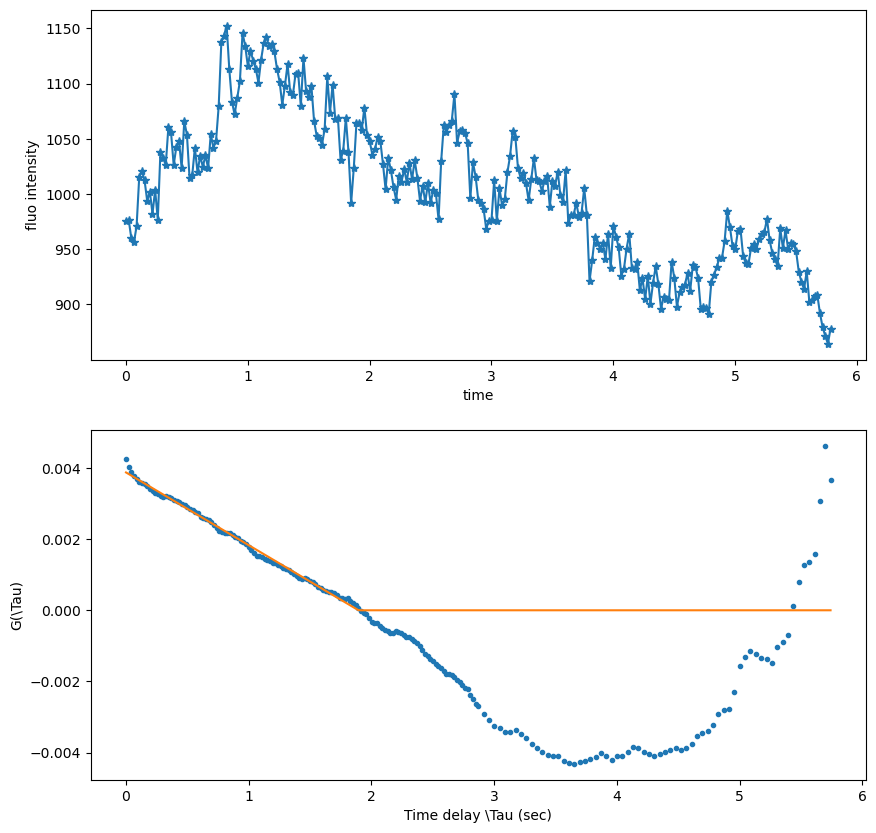

In [21]:
fig, ax = plt.subplots(2,1)

ax[0].plot(x,y, "*-")
# ax[0].plot(x,y_cutoff)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")


ax[1].plot(x_auto, y_auto, '.')
ax[1].plot(x_auto, fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r) )
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
fig.set_size_inches((10,10))

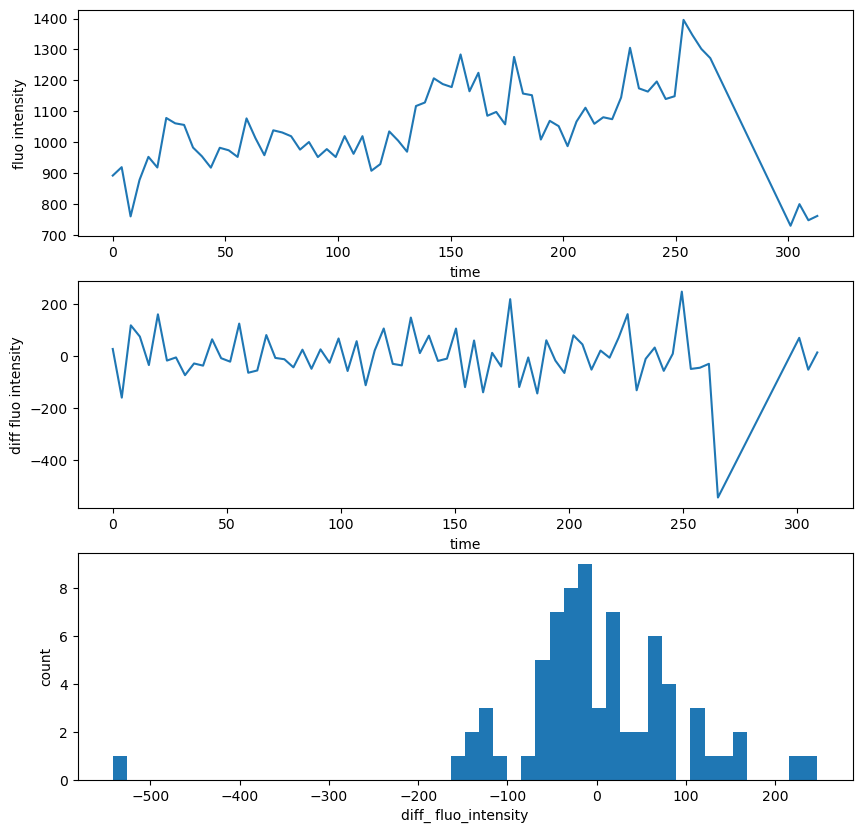

In [9]:
## difference between 2 time points
fig, ax = plt.subplots(3,1)
ax[0].plot(x,y)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

ax[1].plot(x[:-1], np.diff(y))
ax[1].set_xlabel("time")
ax[1].set_ylabel("diff fluo intensity")
_=ax[2].hist(np.diff(y), bins=50)
ax[2].set_ylabel("count")
ax[2].set_xlabel("diff_ fluo_intensity")
fig.set_size_inches((10,10))

to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix


/tmp/ipykernel_19233/1848785367.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2,1)


to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix
to fix
original method
to fix


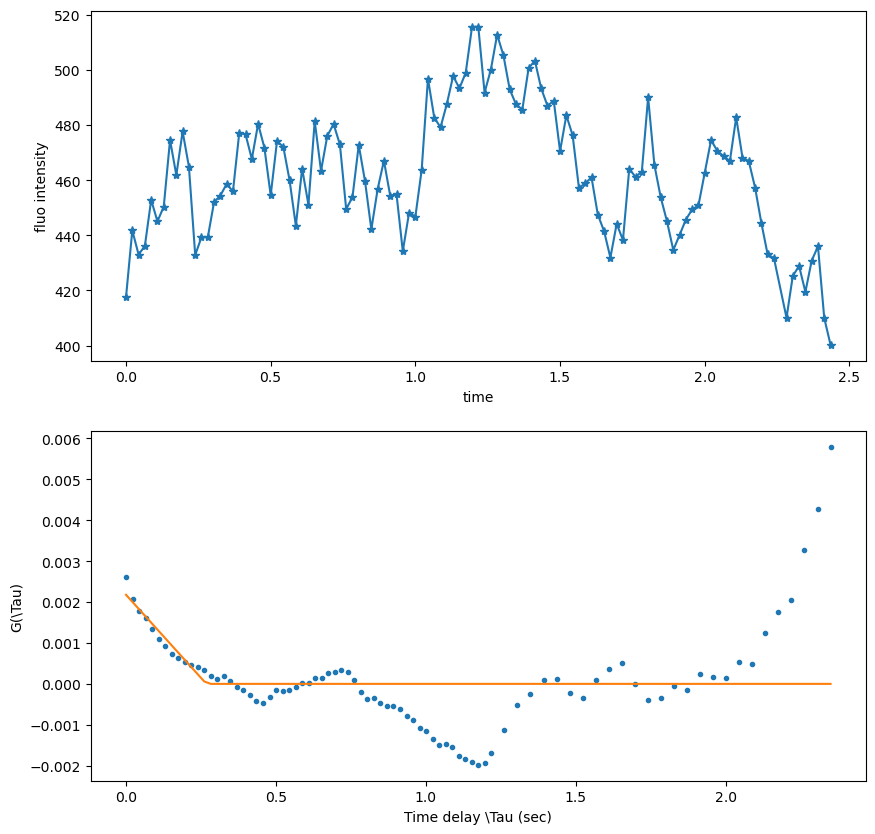

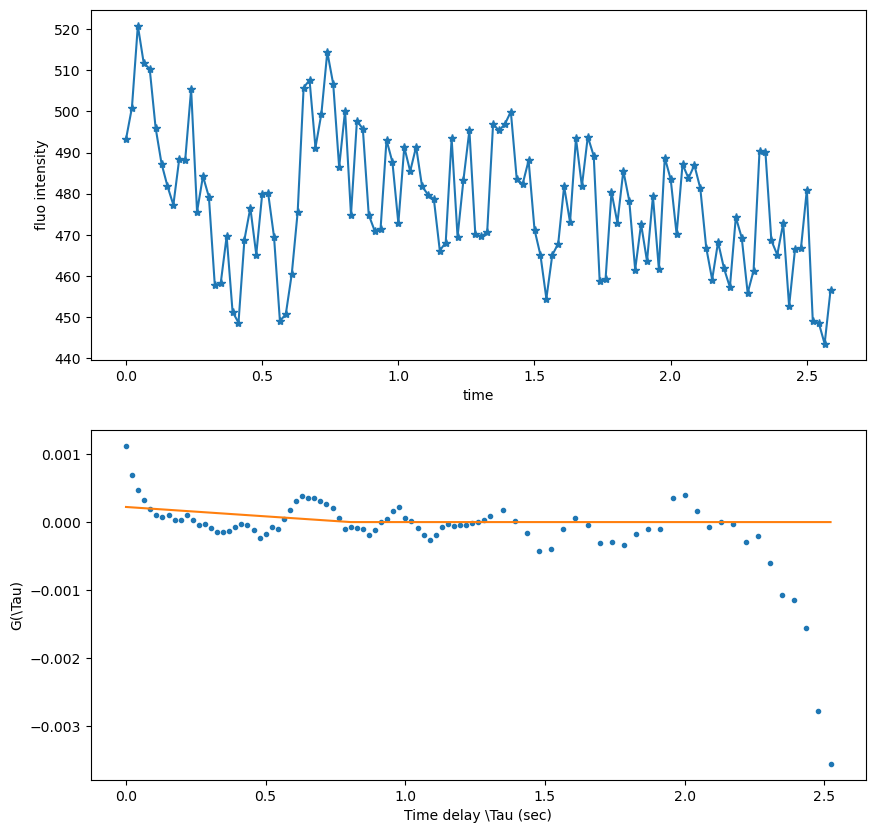

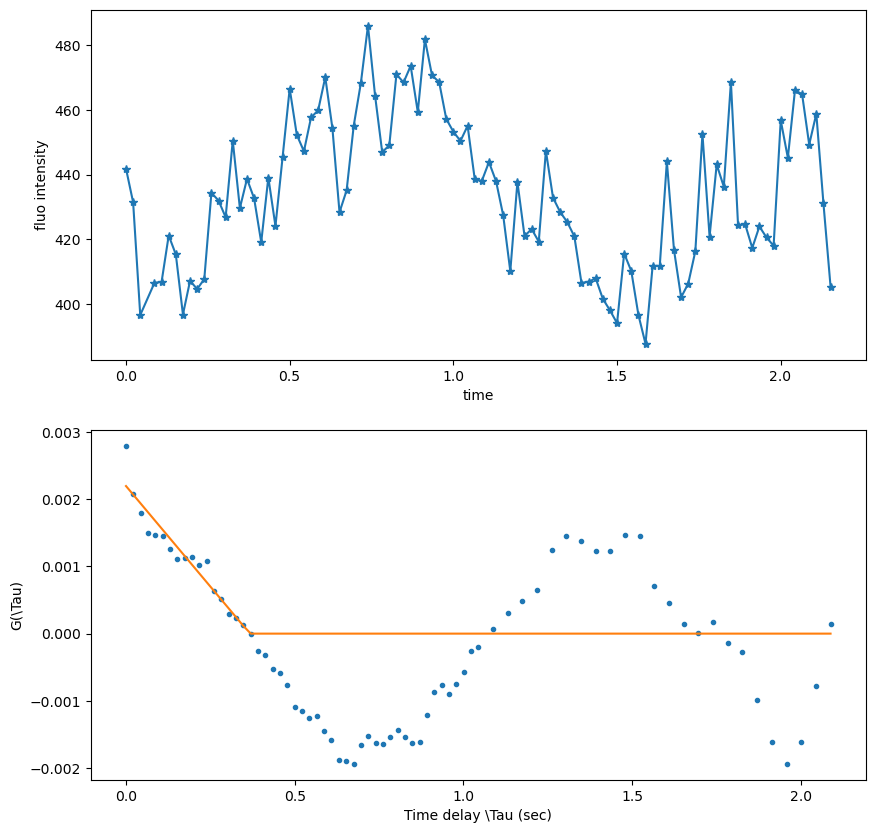

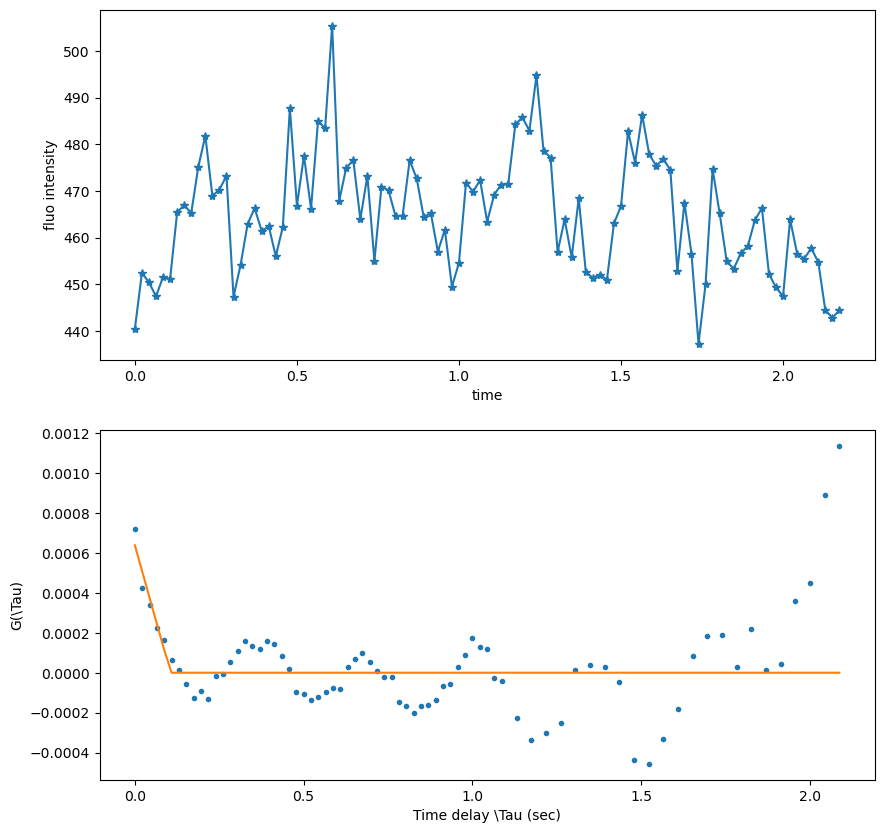

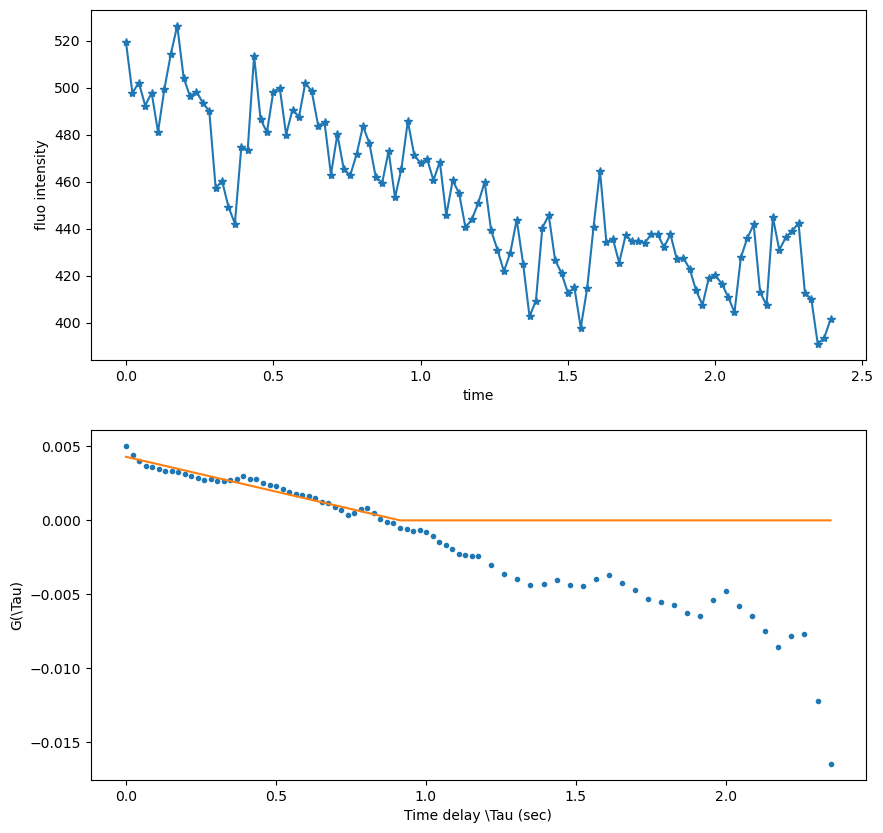

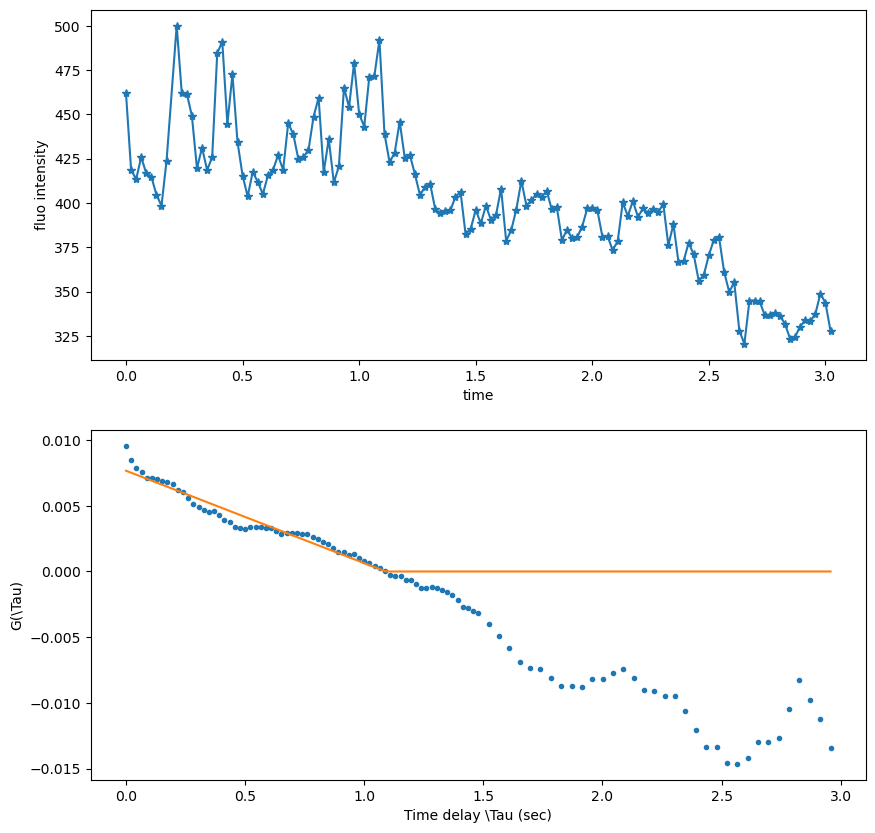

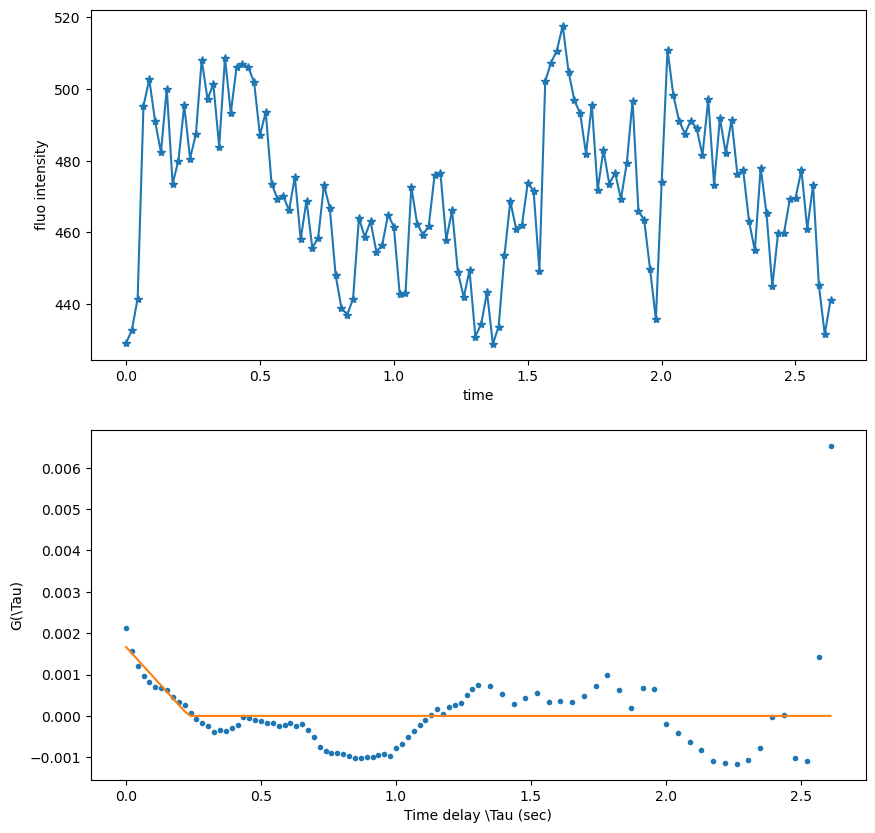

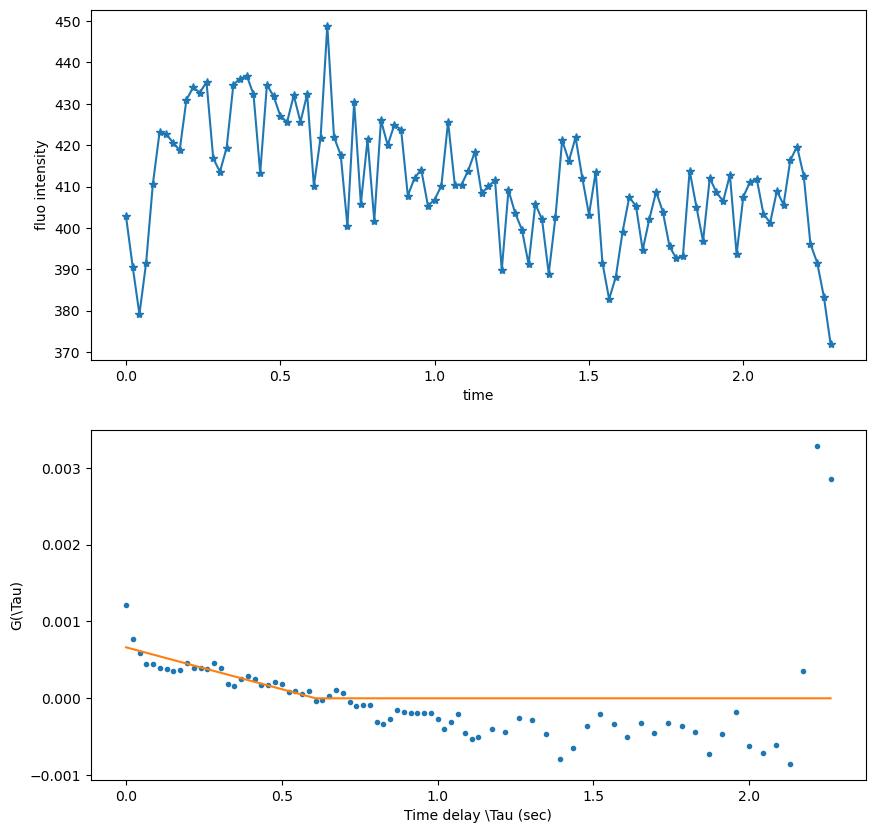

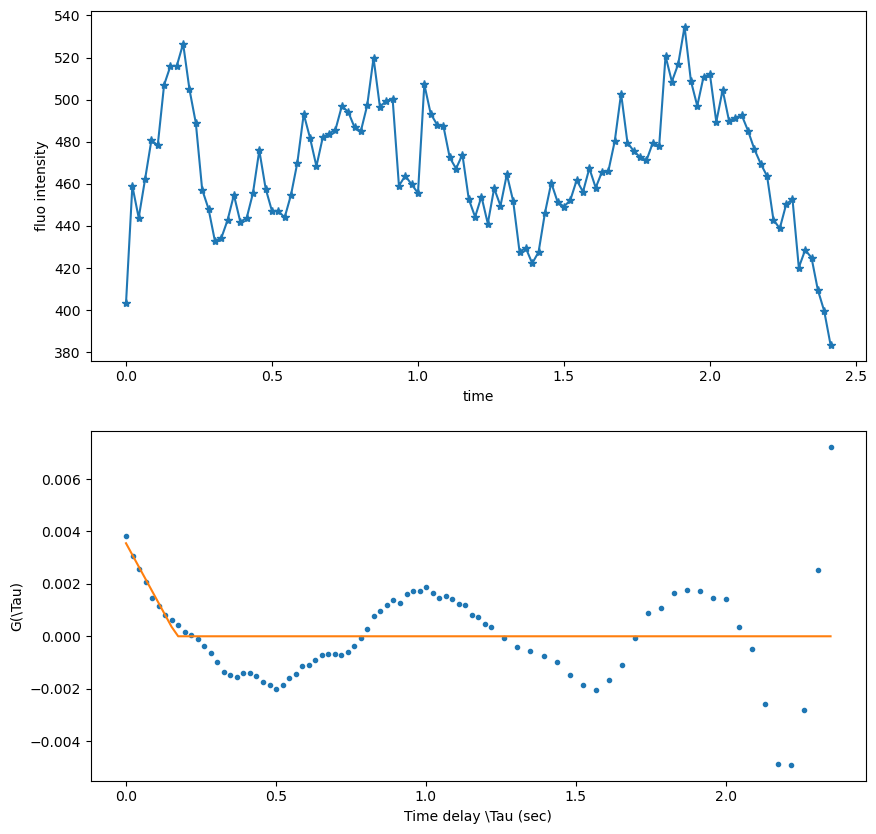

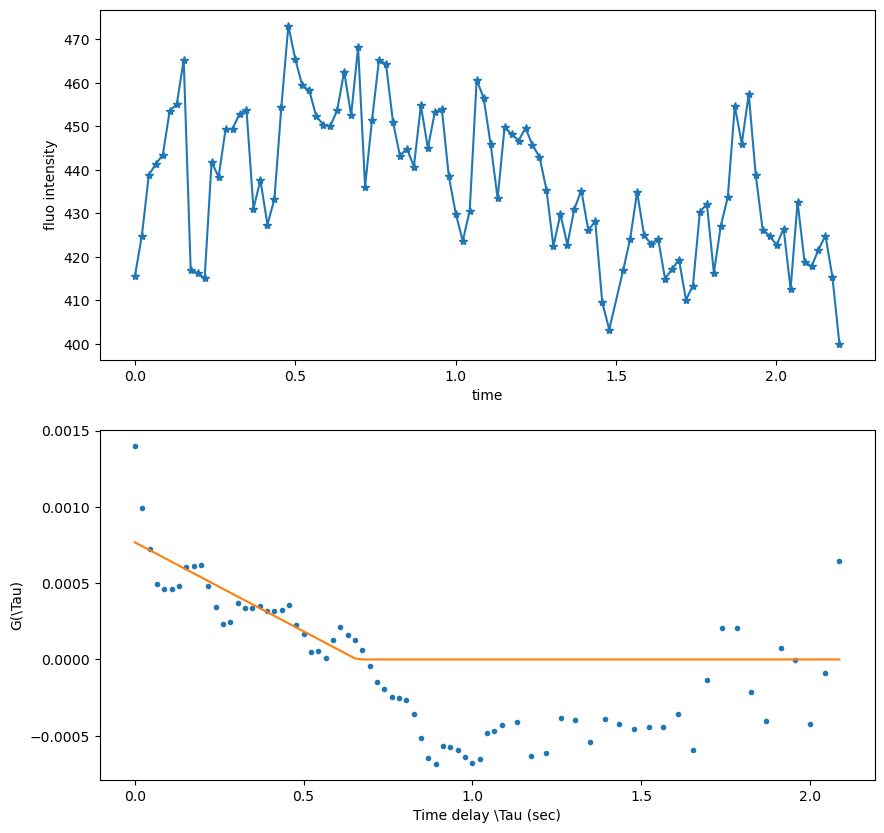

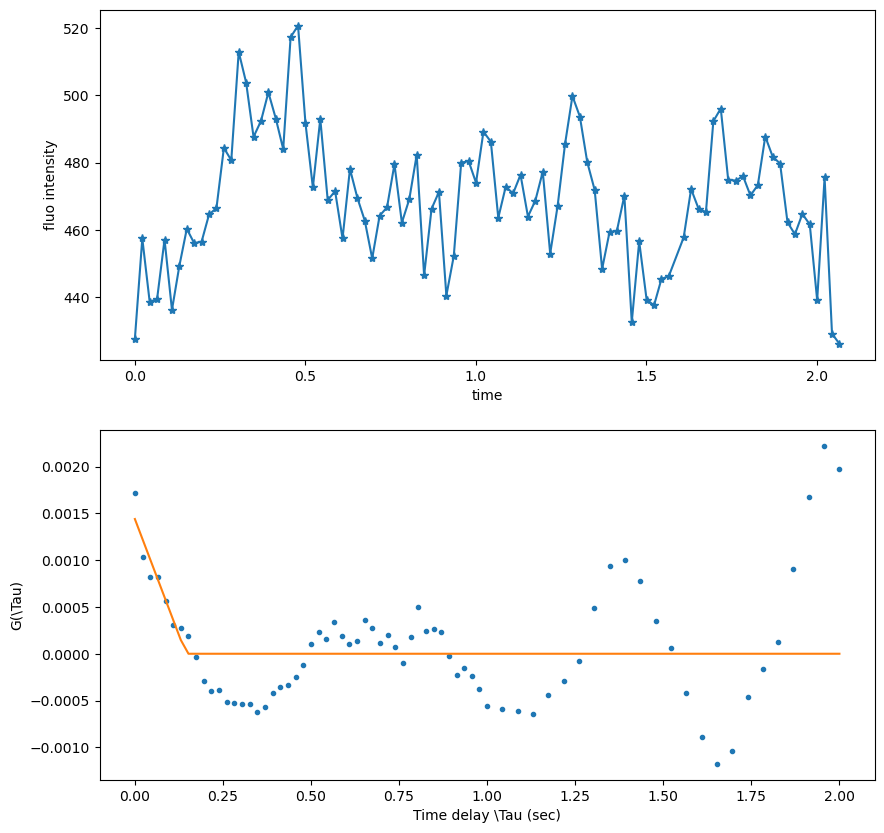

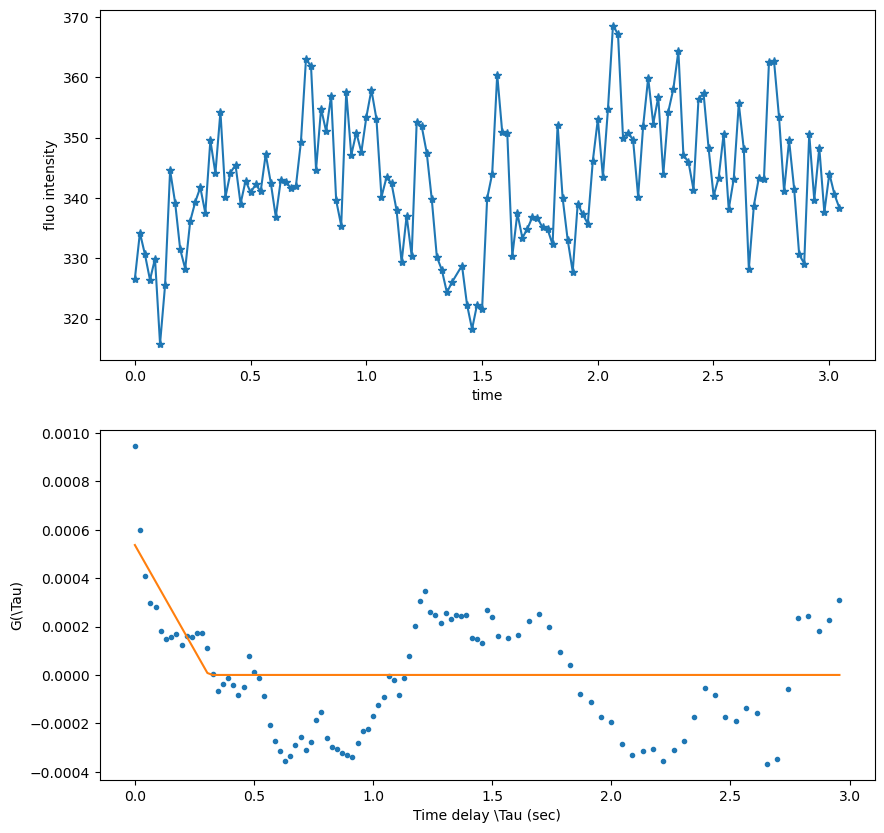

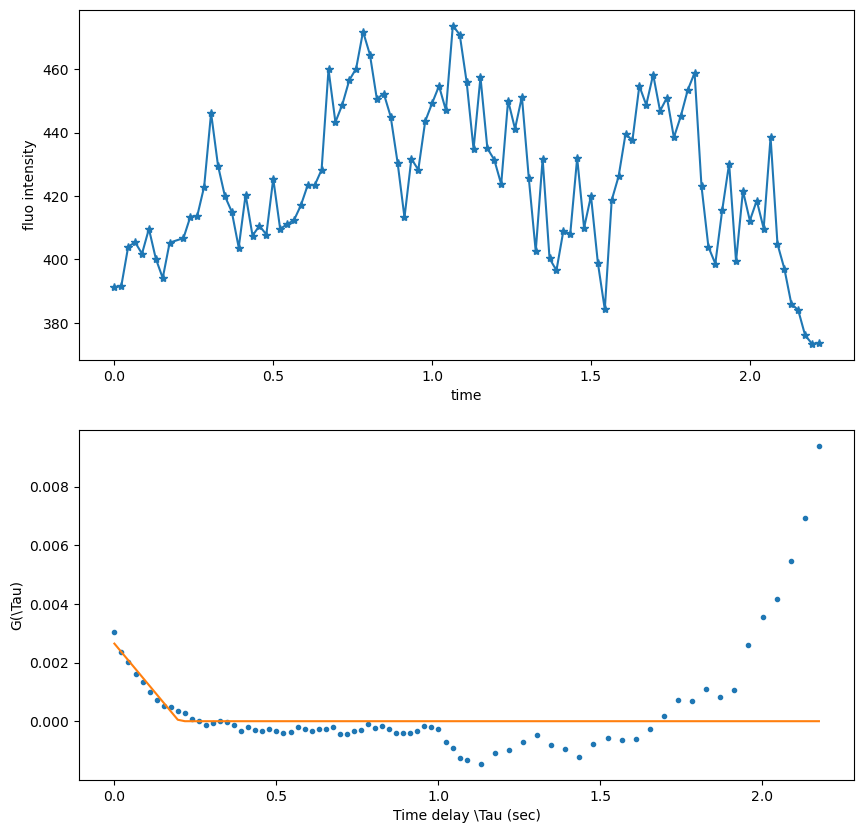

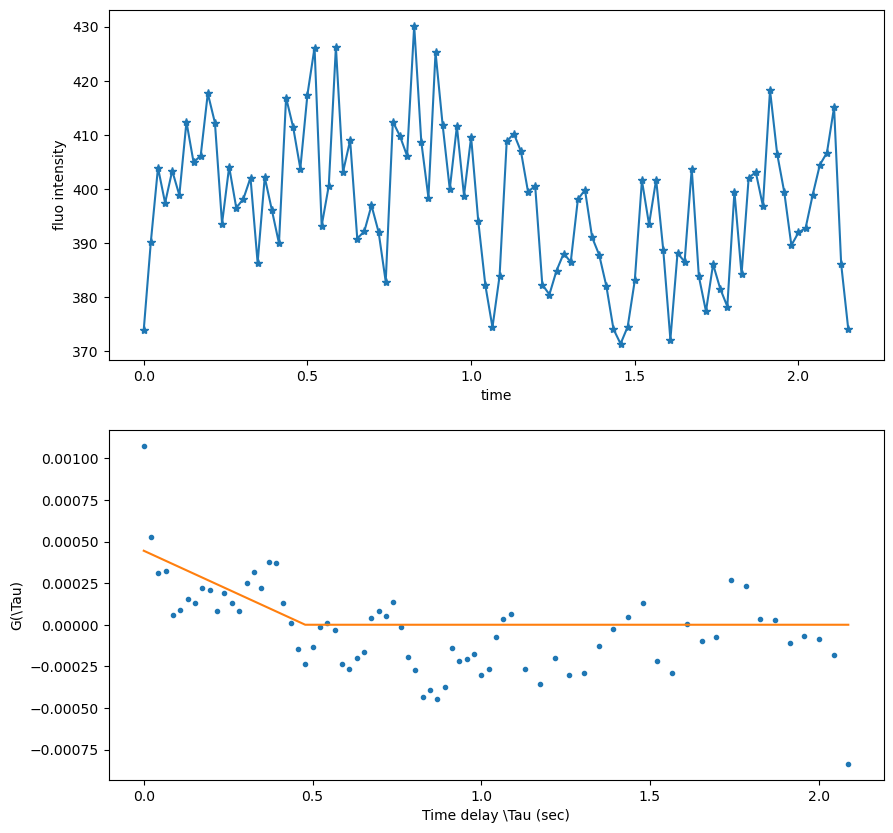

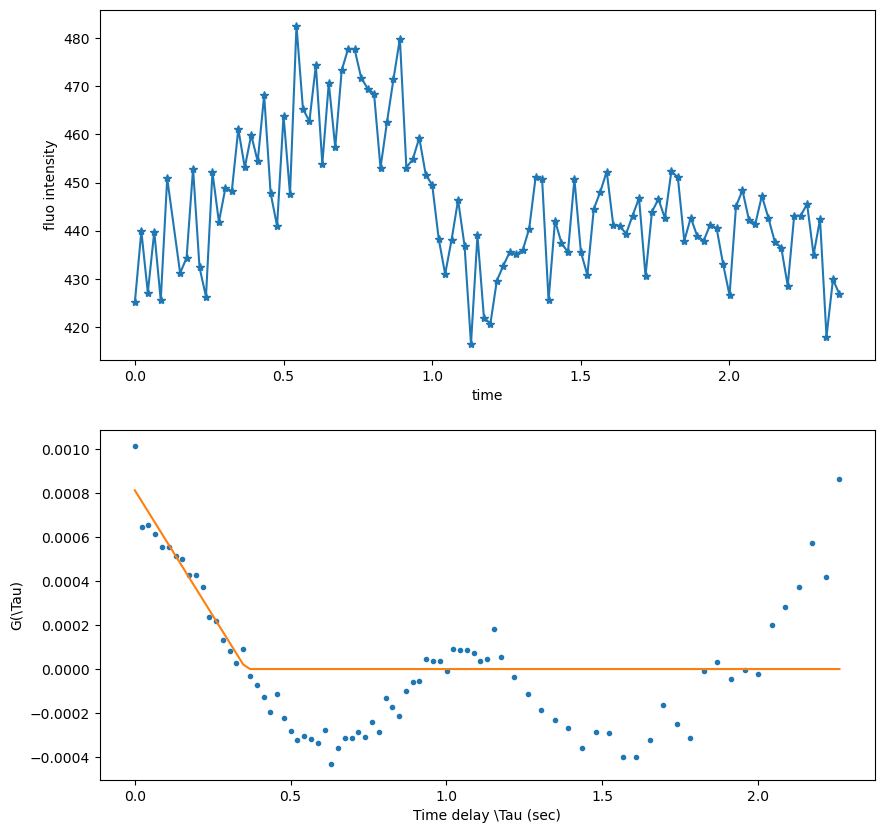

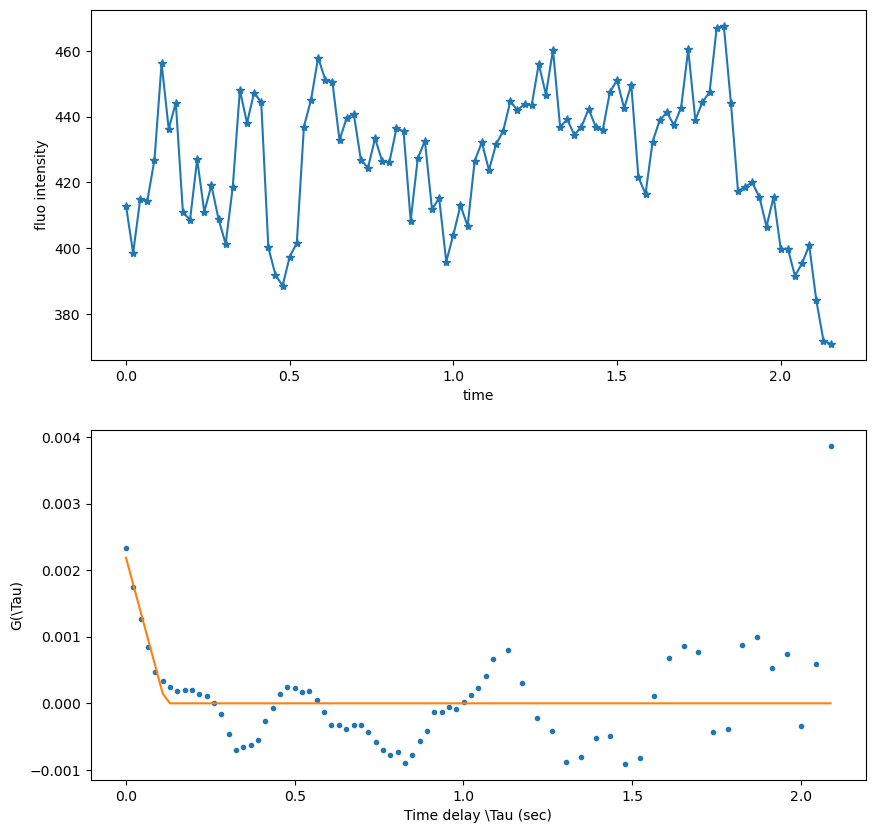

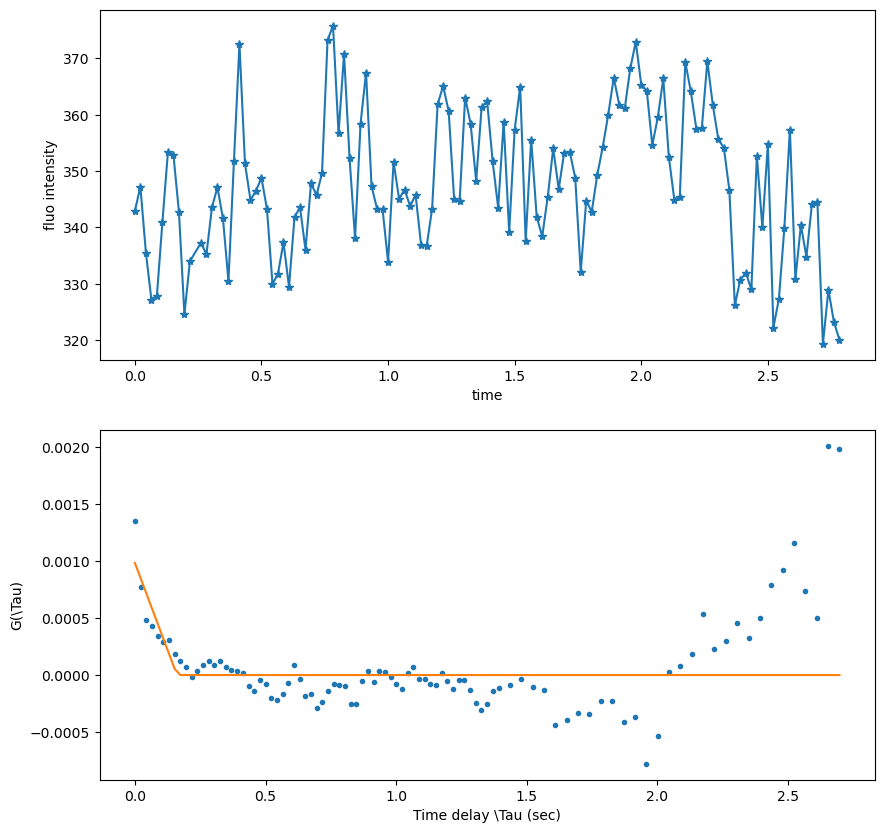

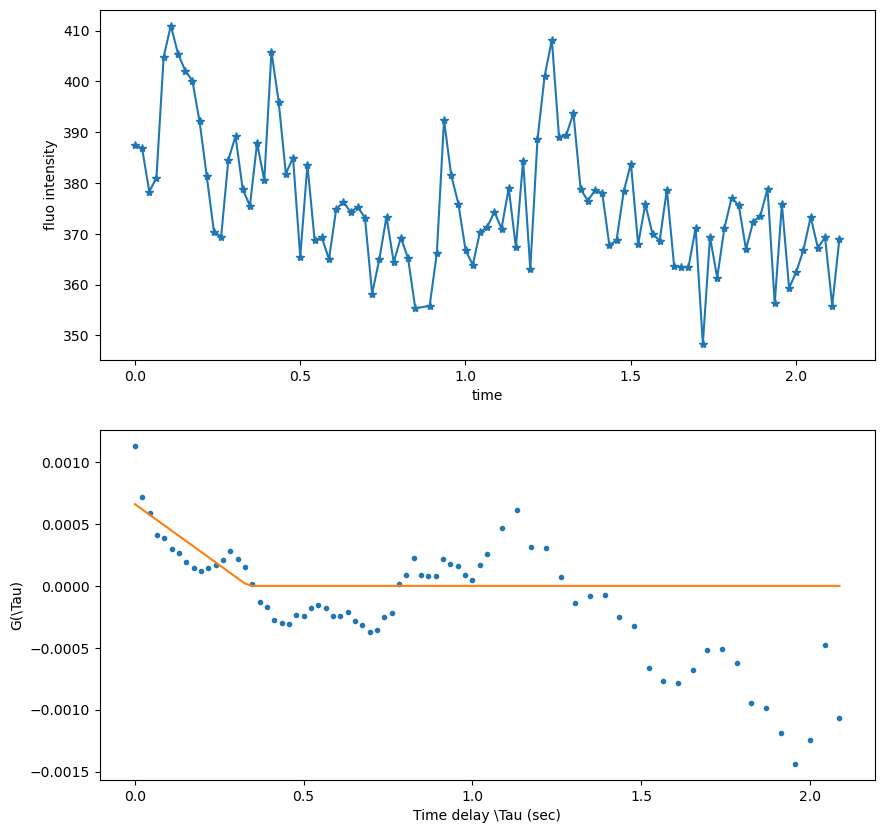

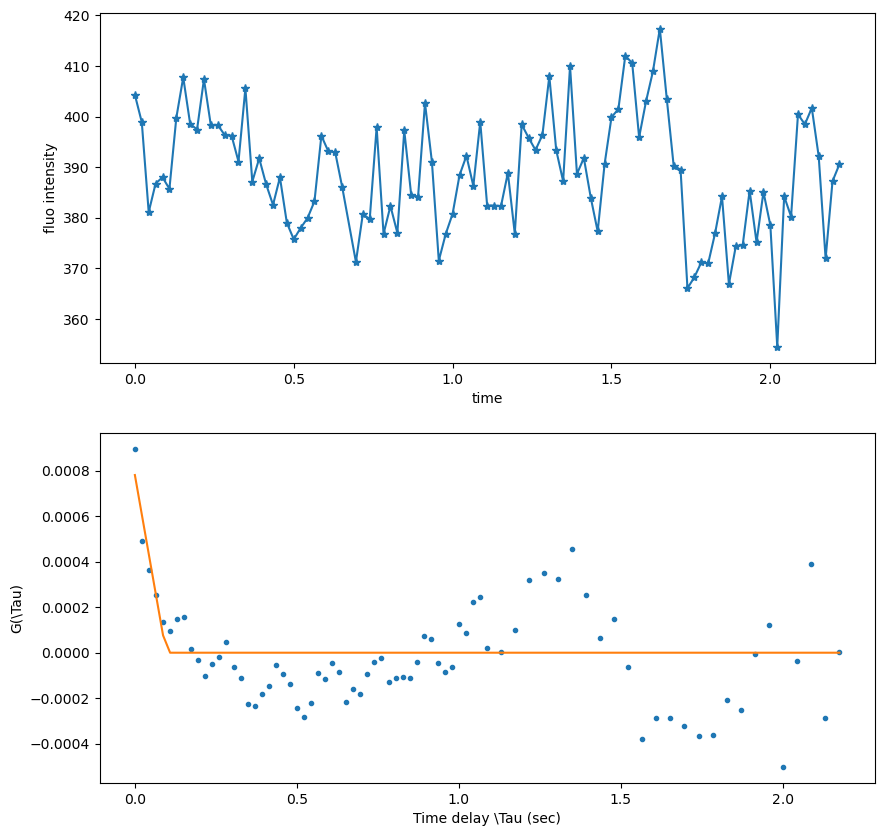

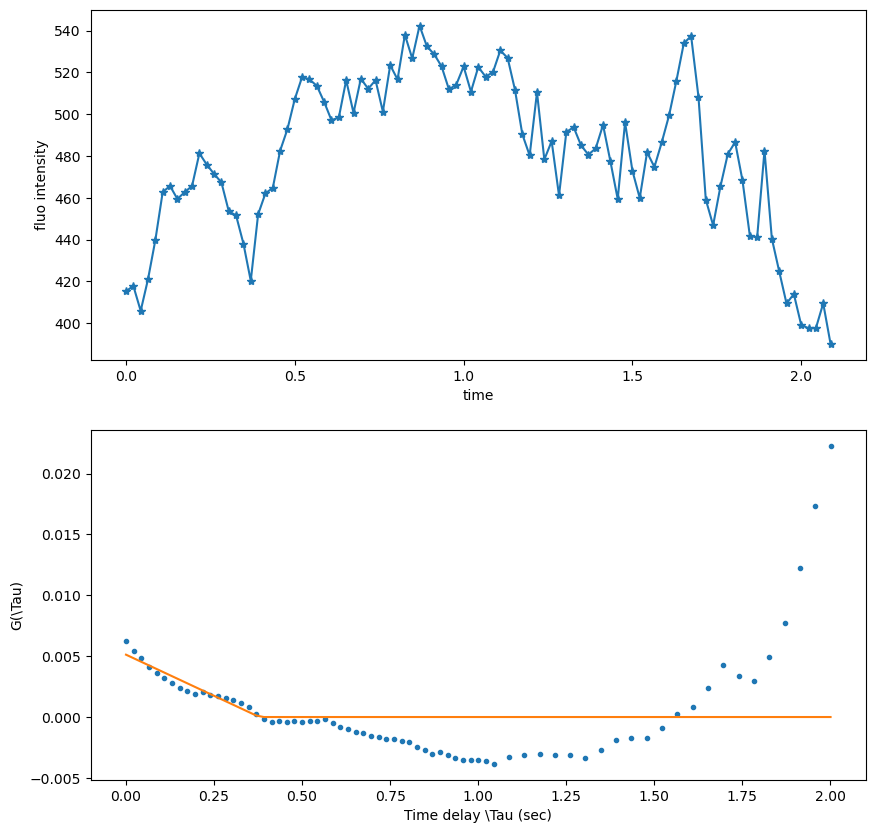

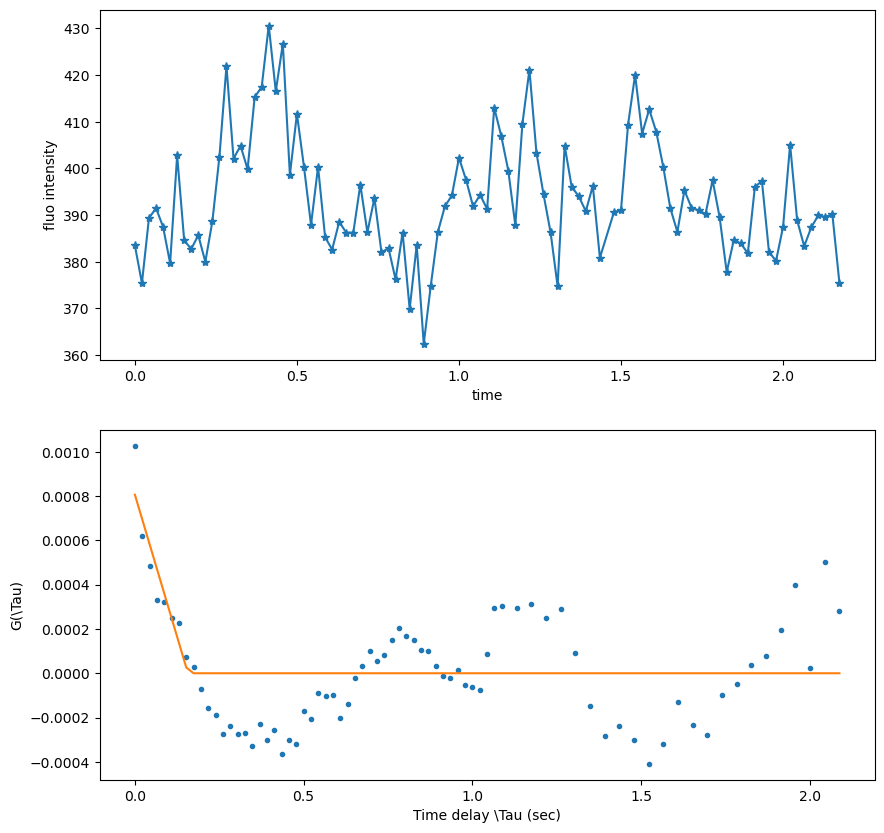

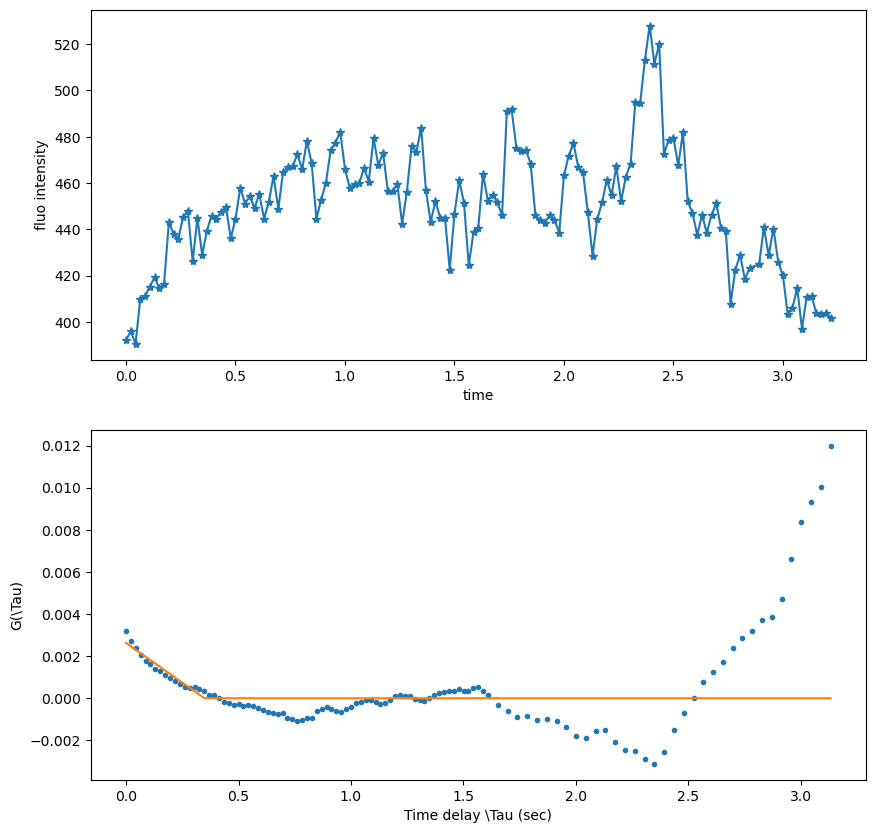

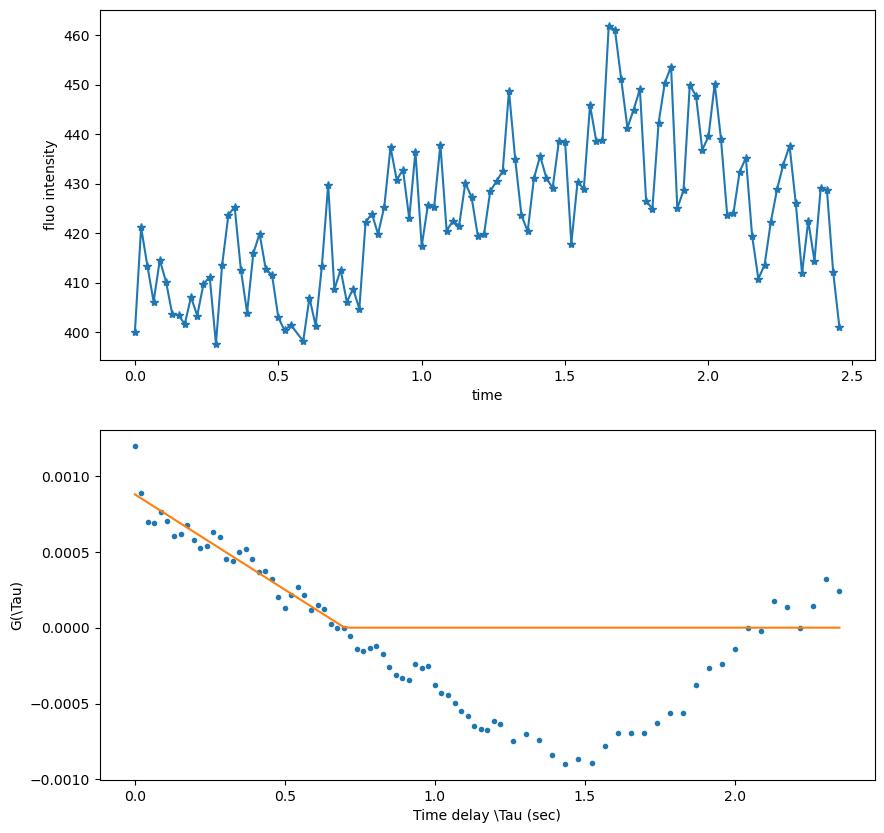

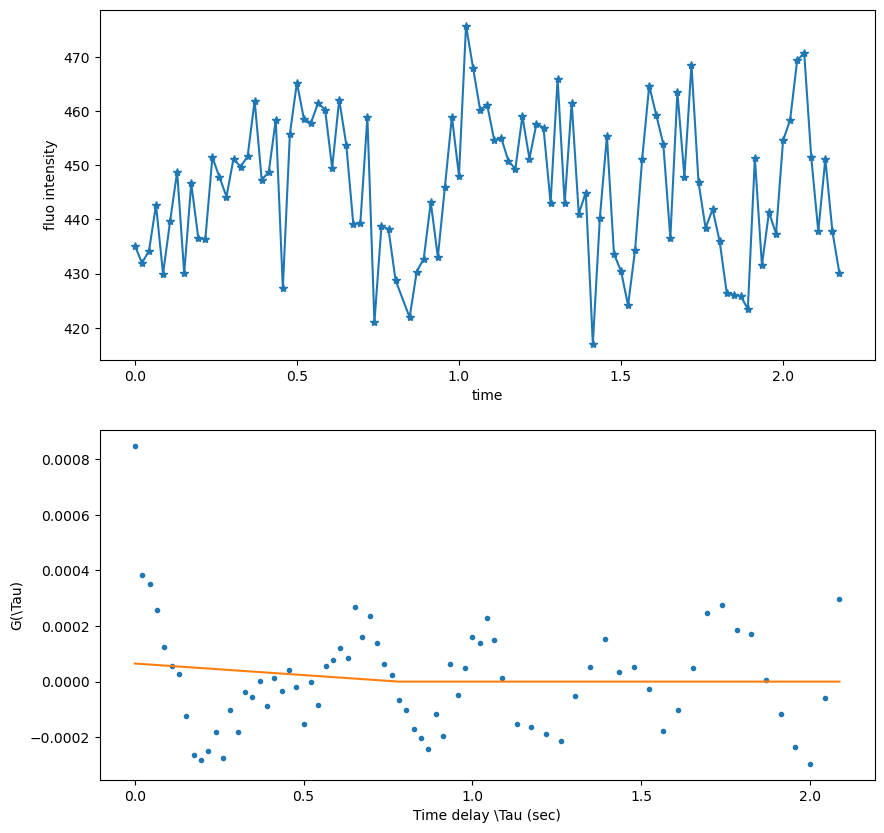

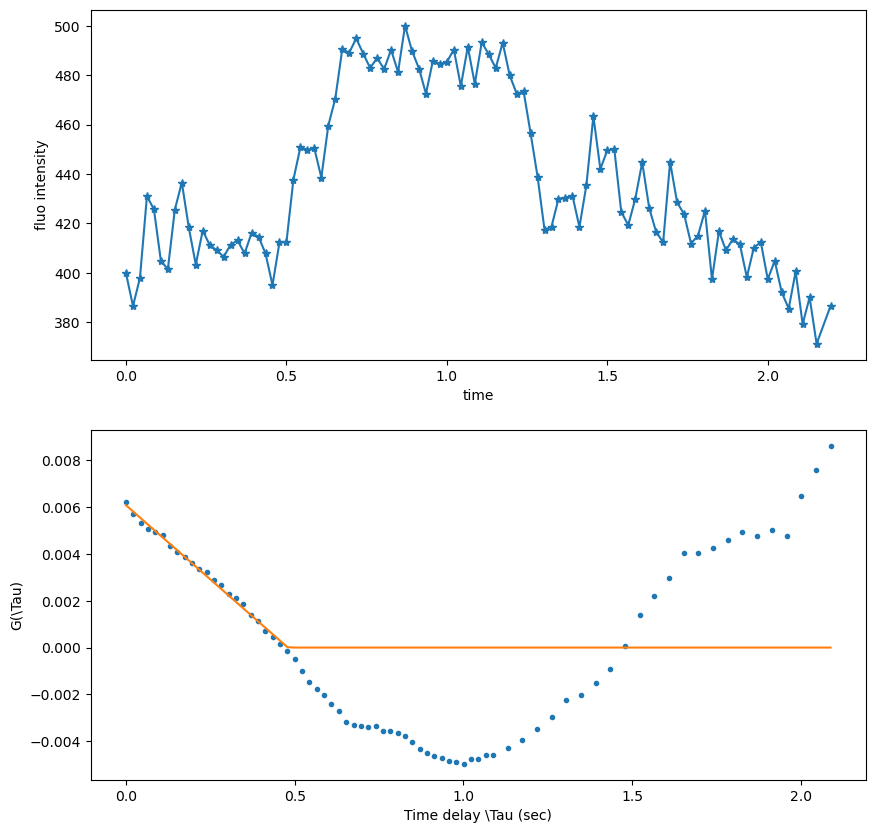

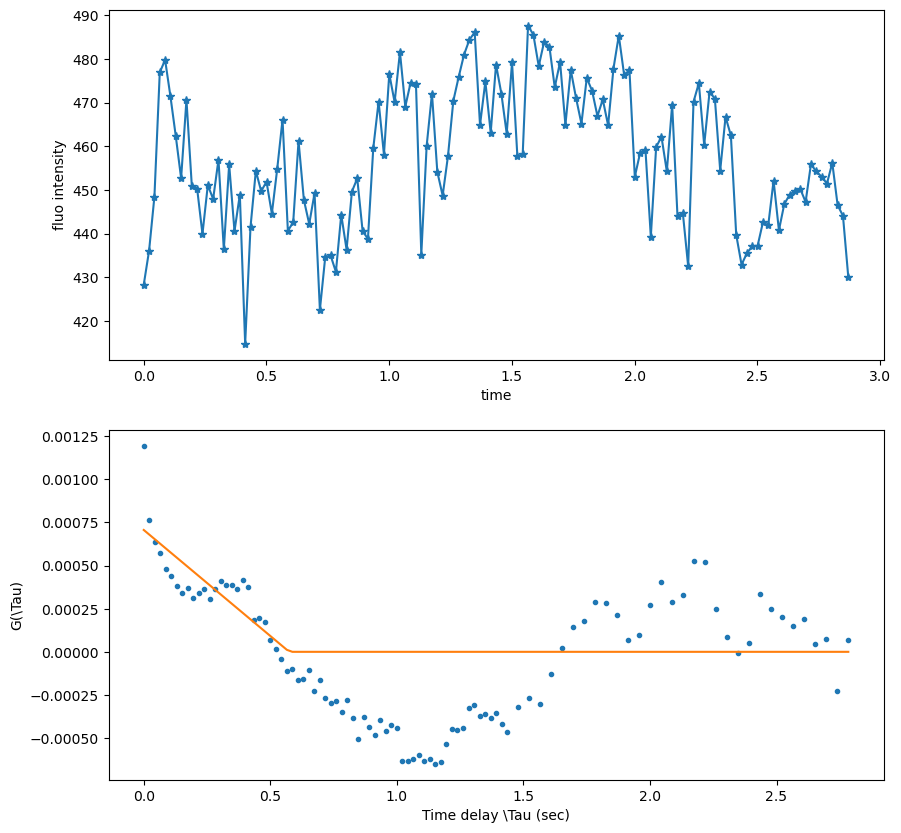

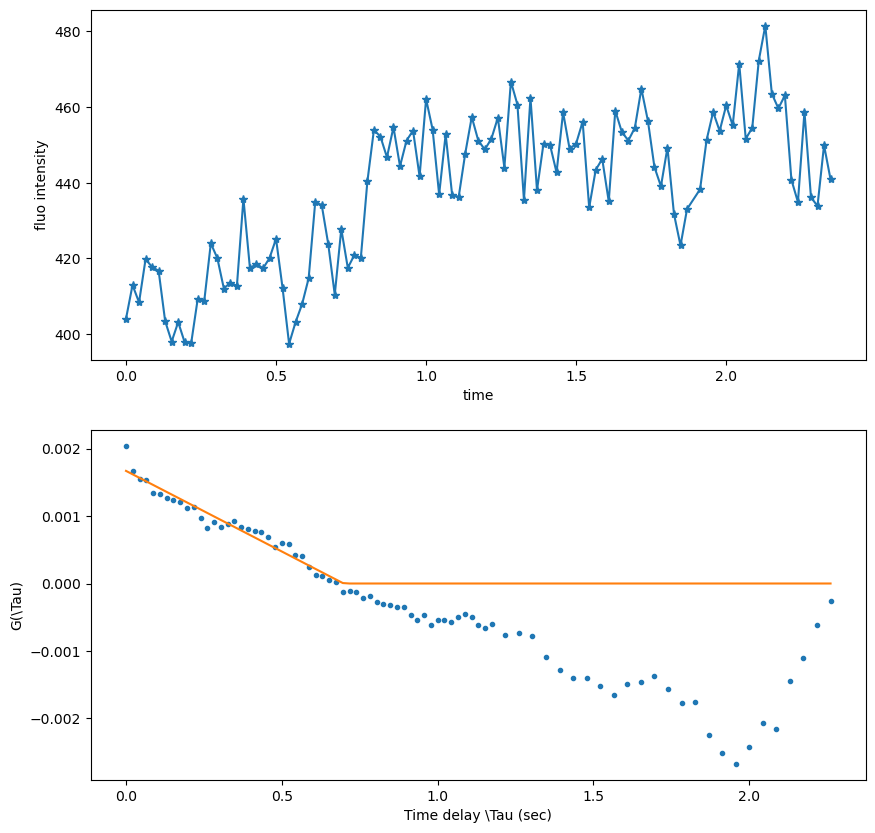

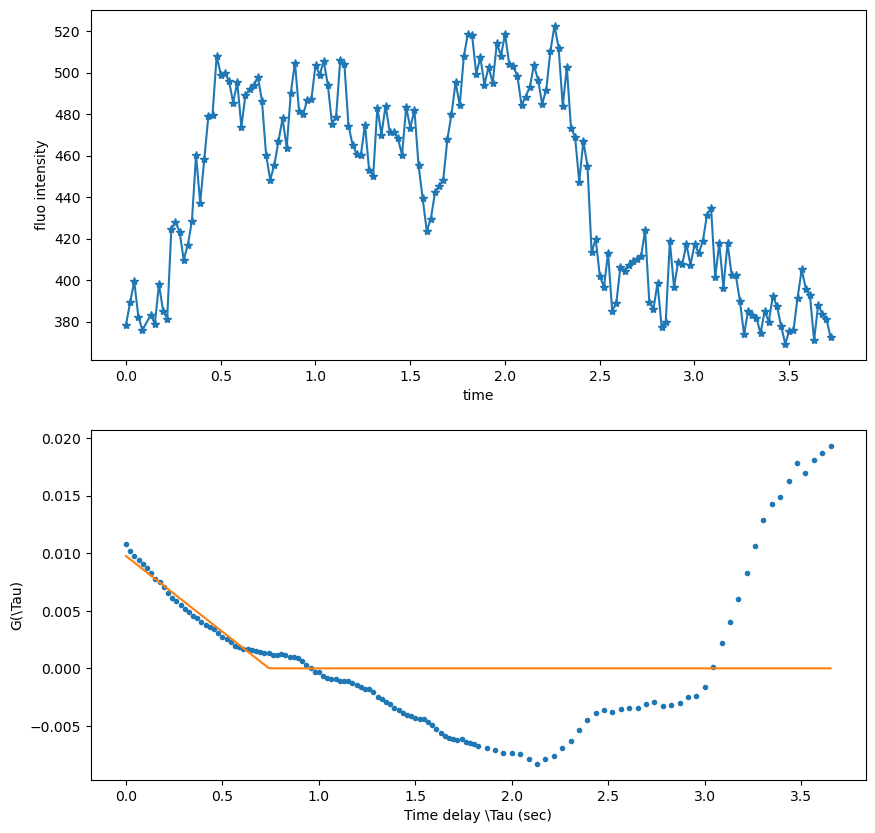

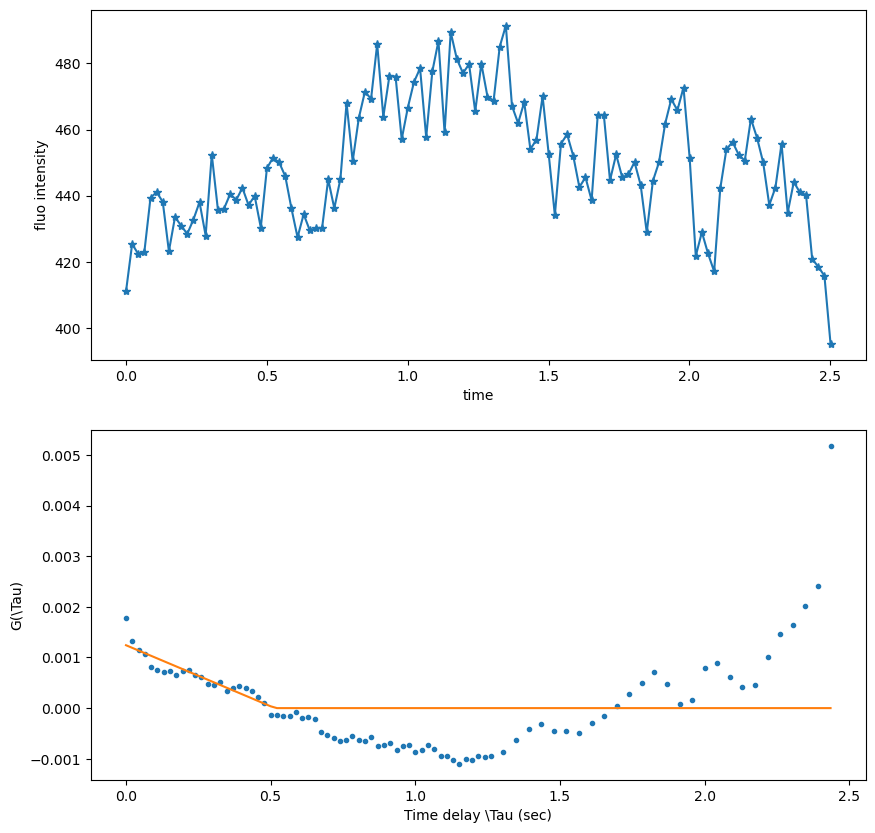

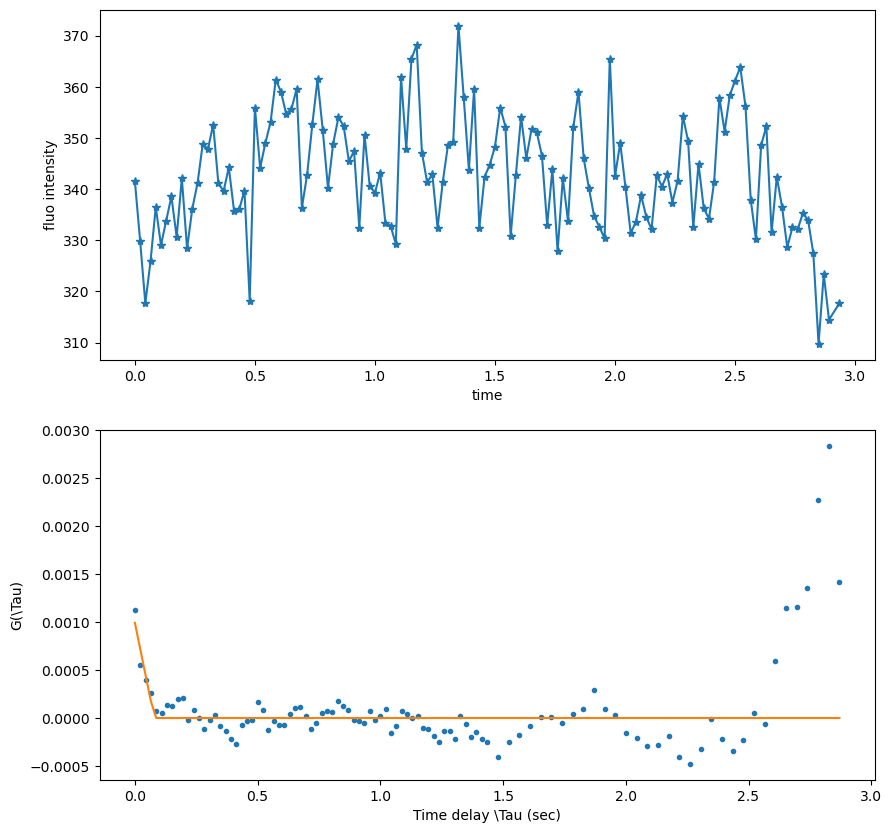

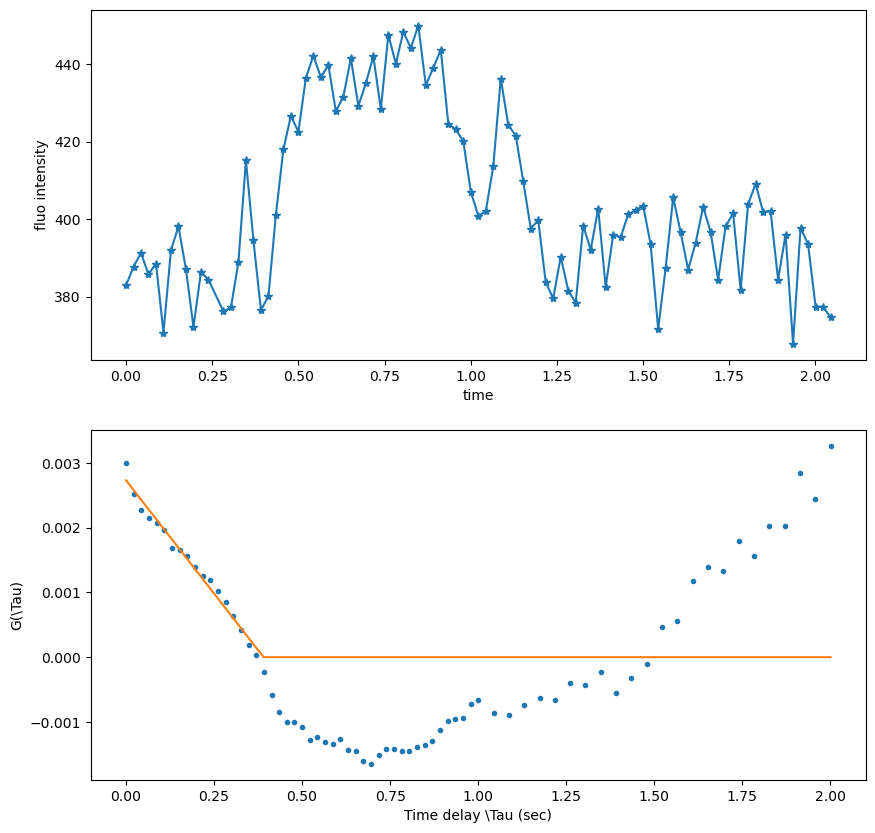

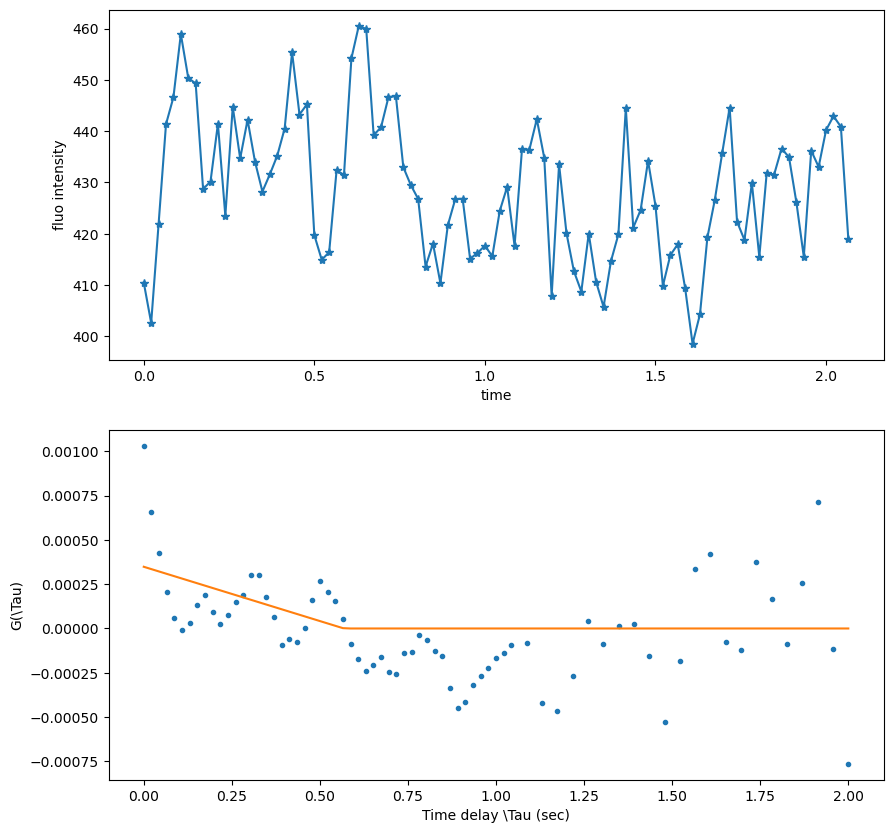

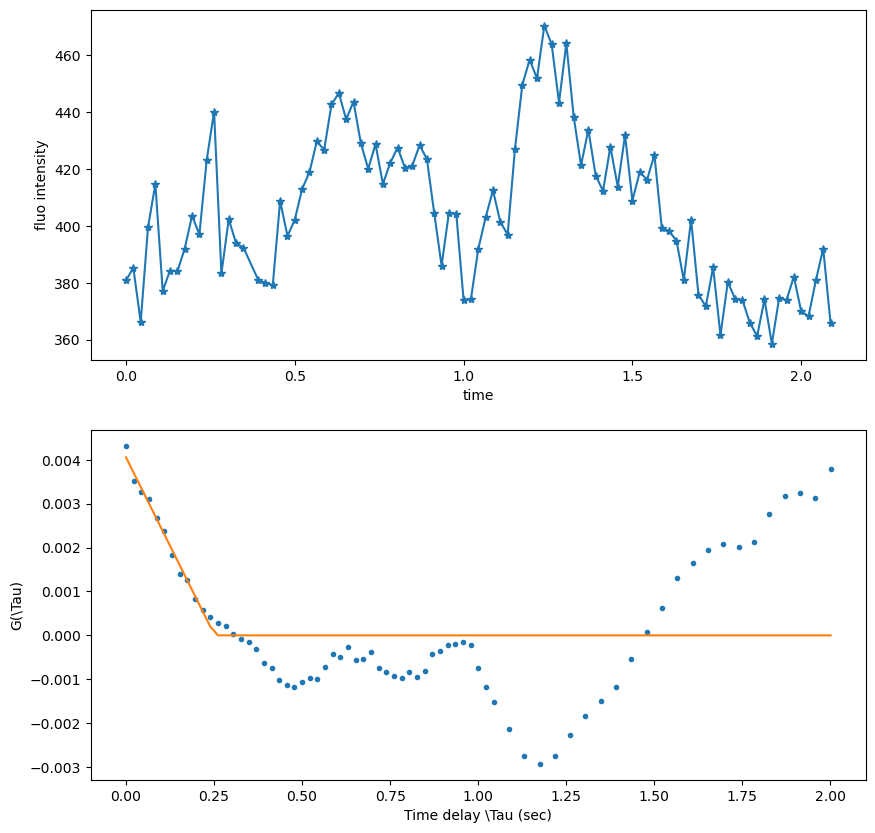

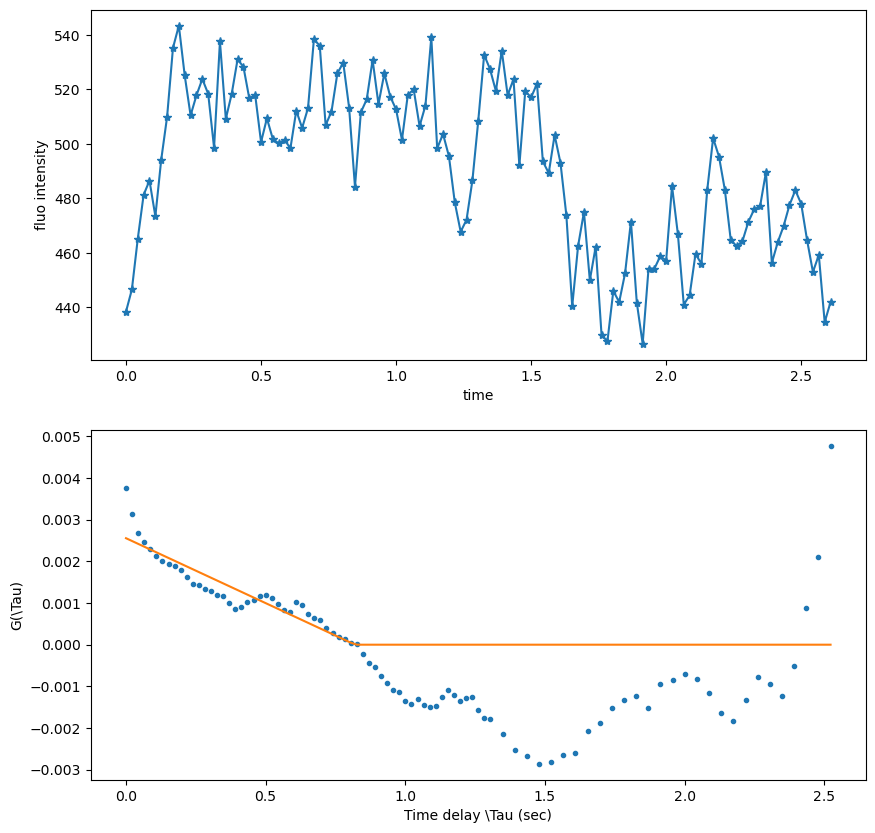

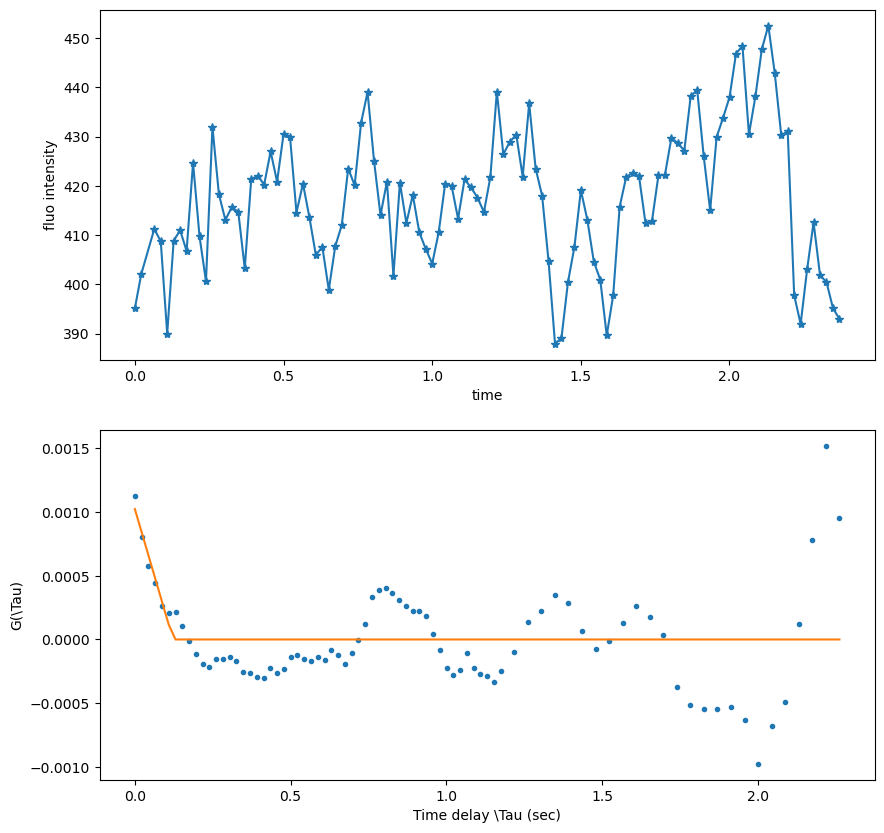

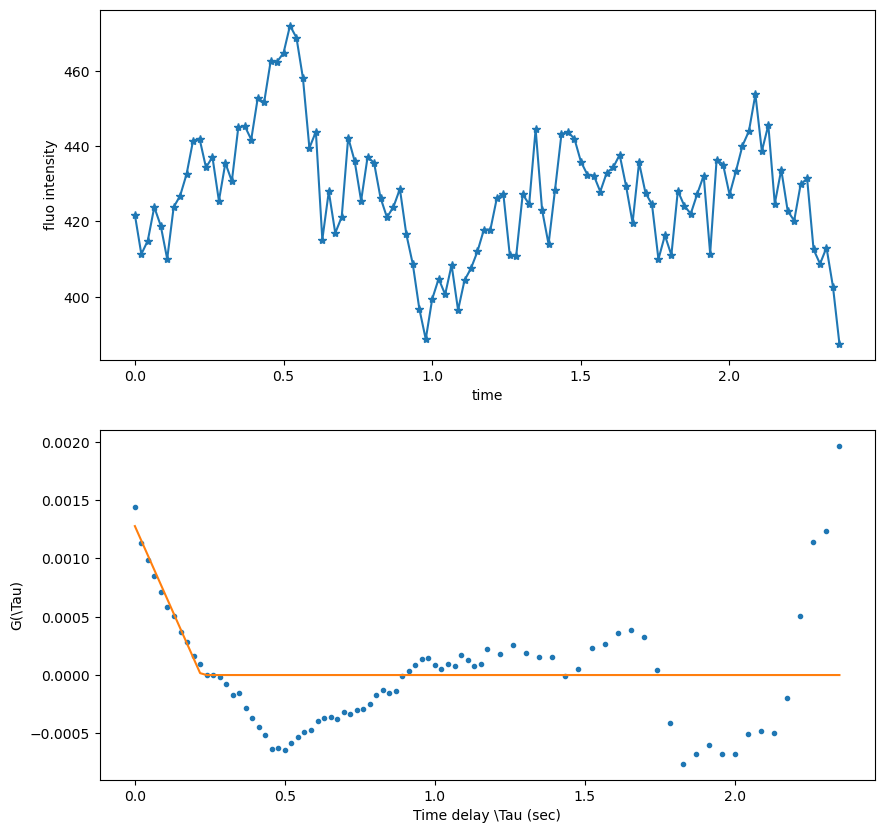

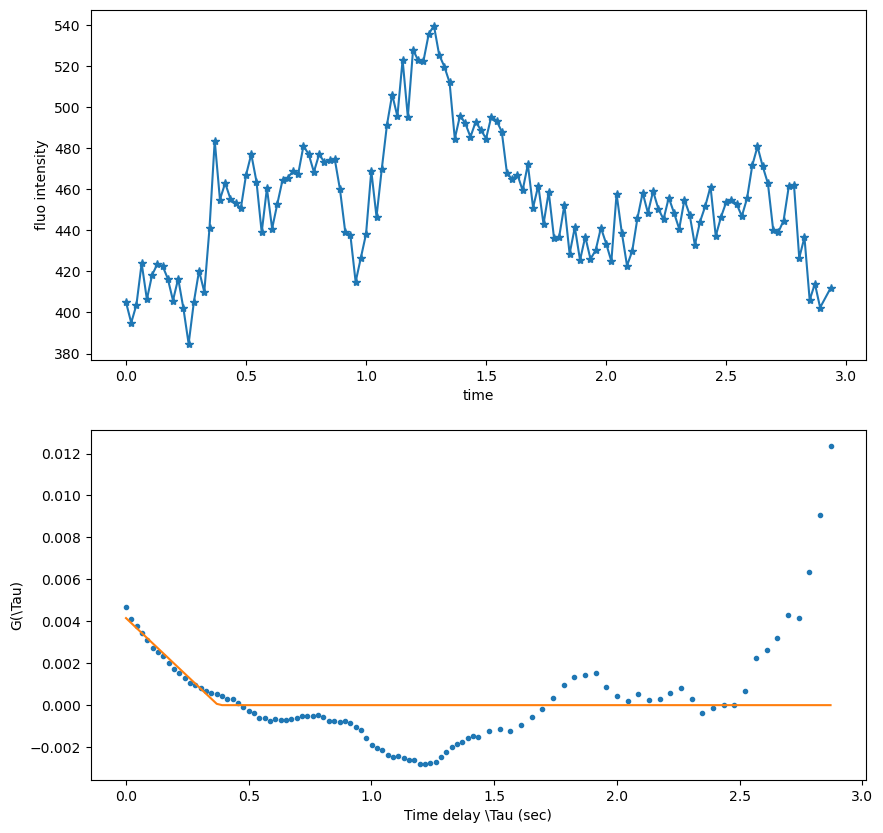

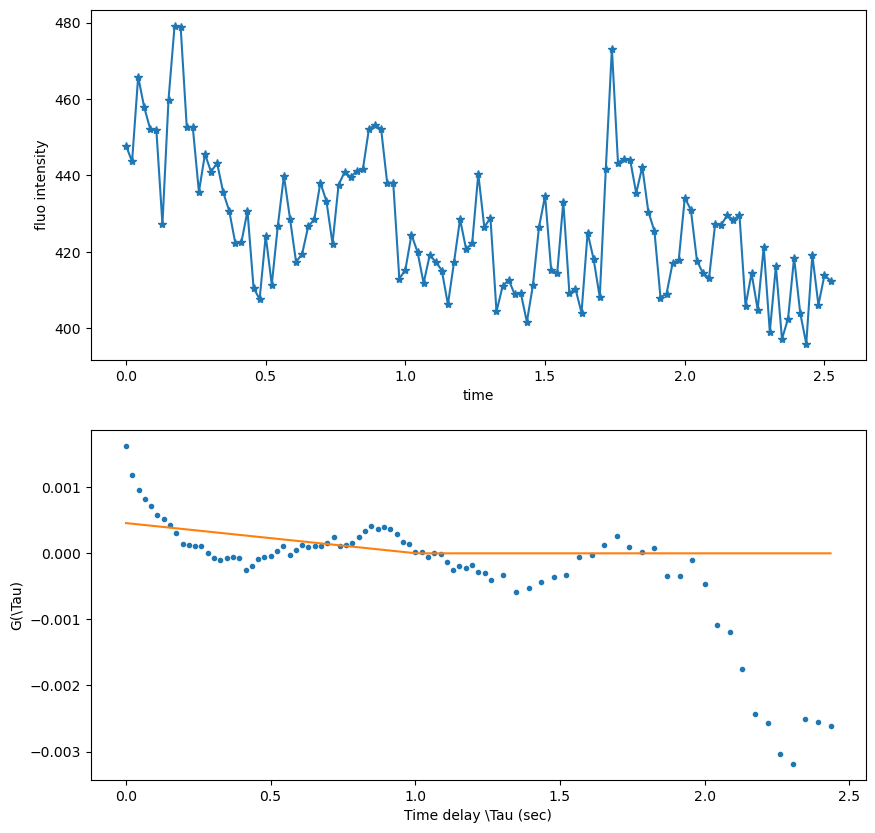

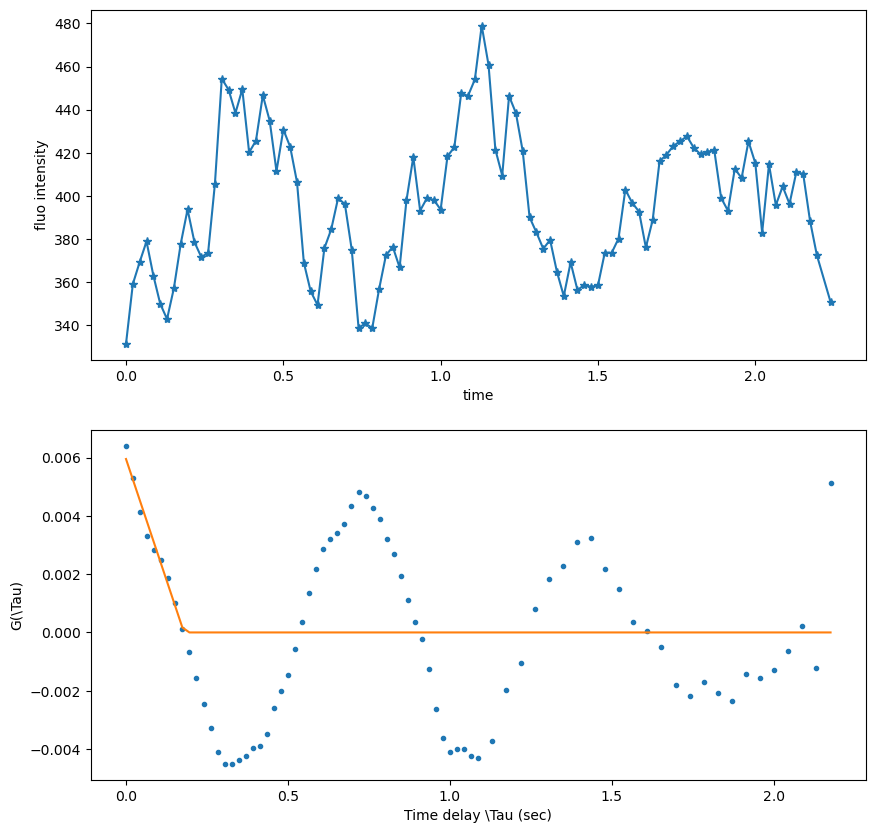

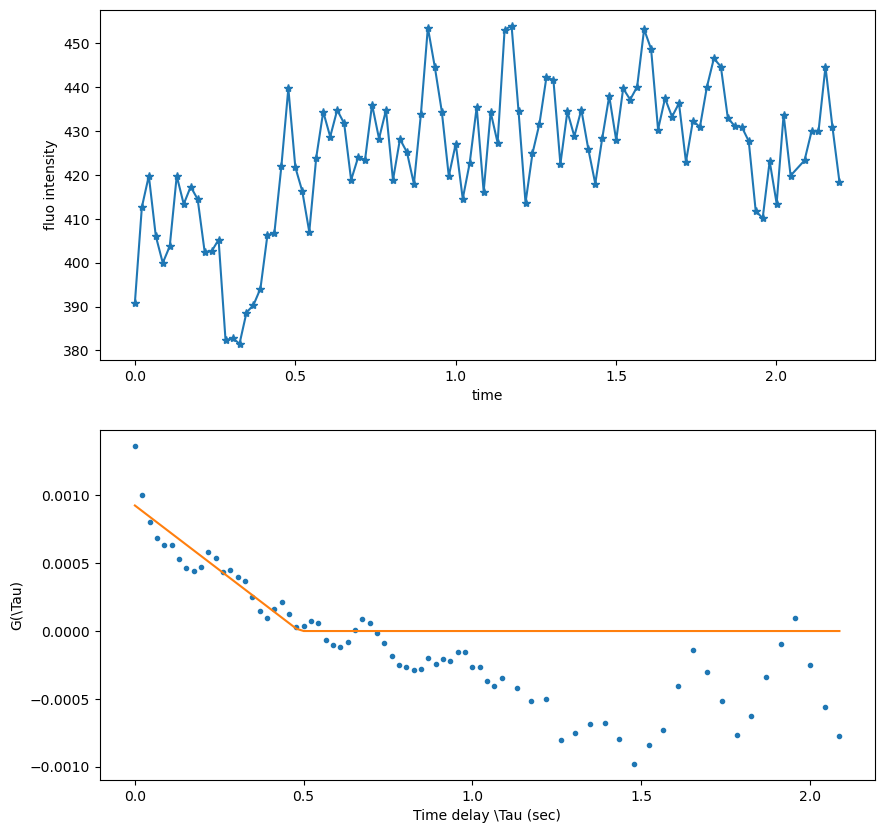

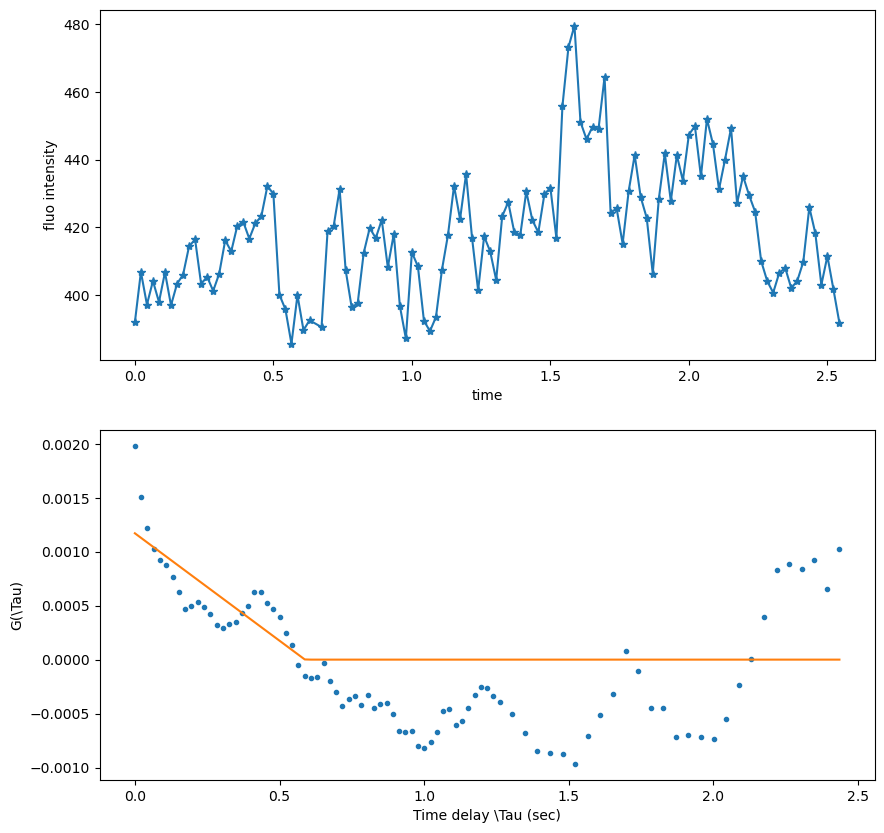

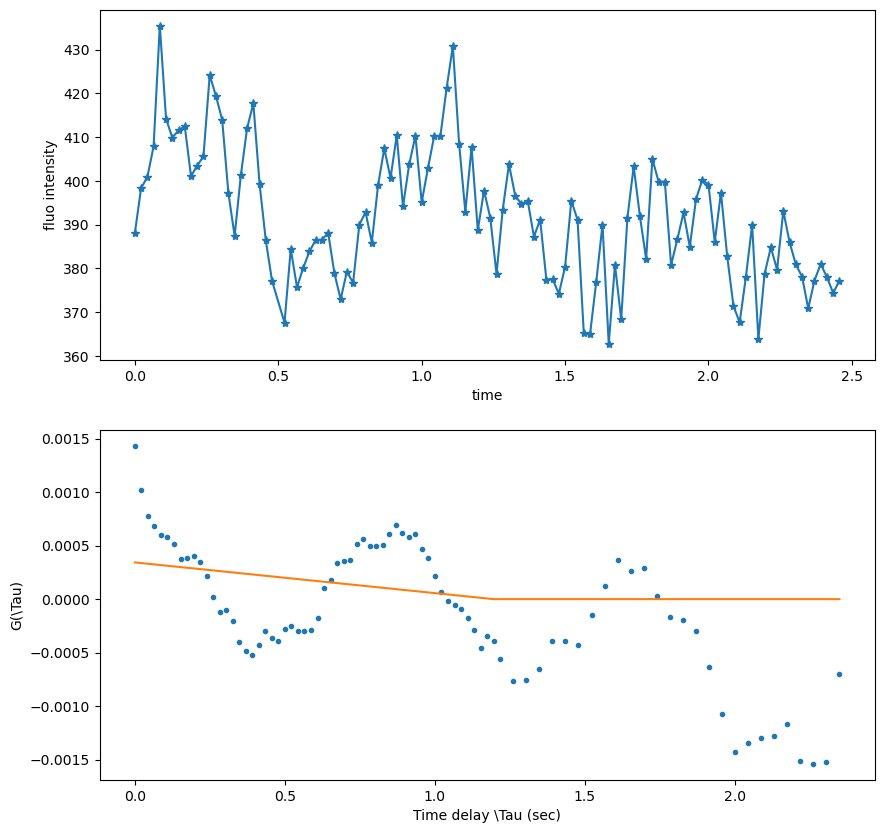

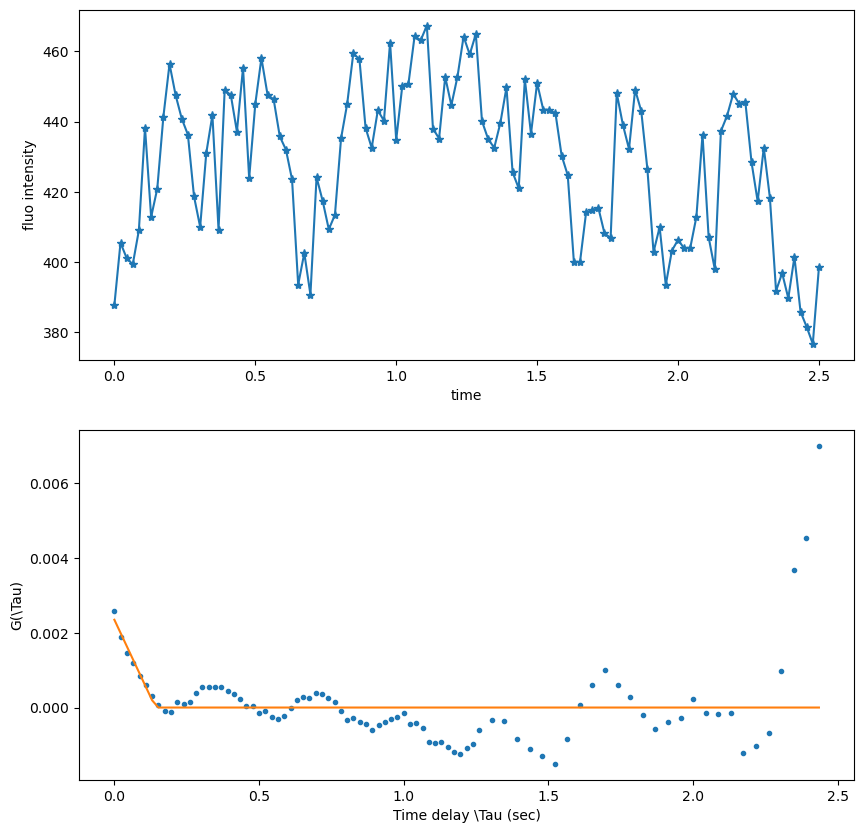

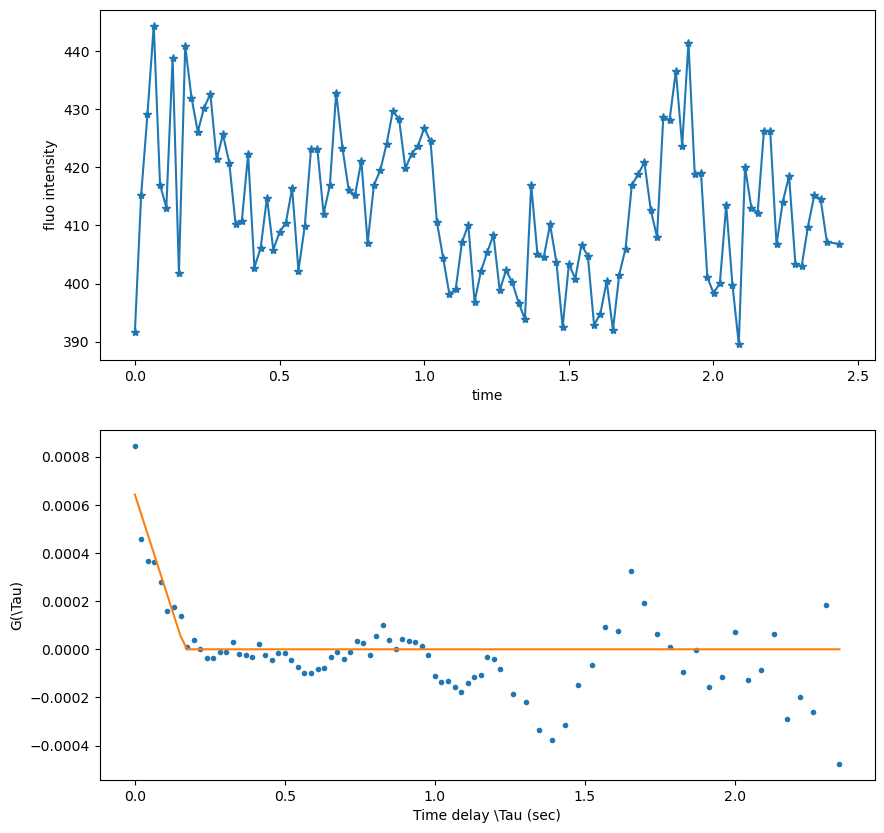

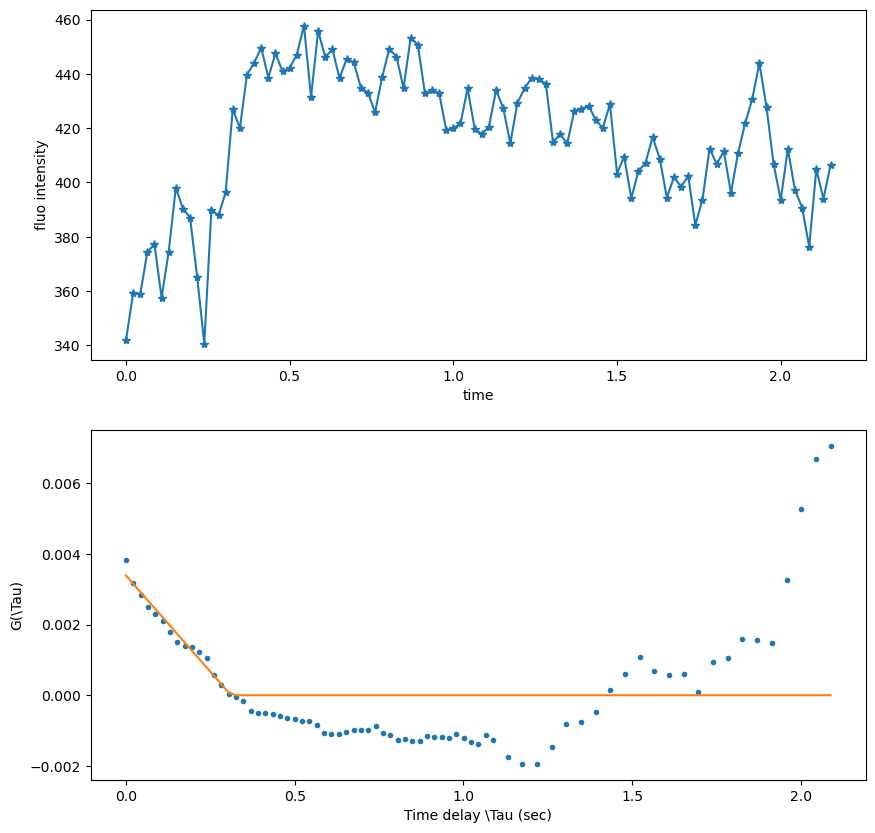

In [38]:
delta_t = DELTA_T
rtol=1e-5
for id_track in np.unique(datas.TRACK_ID):
    (x, 
     y, 
     x_auto, 
     y_auto, 
     elongation_r, 
     translation_init_r,
     perr) = single_track_analysis(datas, 
                                             id_track, 
                                             delta_t = DELTA_T,
                                             protein_size=PROTEIN_SIZE,
                                             normalise_intensity=1,
                                             normalize_auto=True,
                                             mm=None,
                                             lowpass_=False,
                                             cutoff=100,
                                             rtol=1e-5,
                                             method="original",
                                            force_analysis=False)
    
    normalise_intensity=1
    x = (datas[datas.TRACK_ID == id_track].sort_values('FRAME')['POSITION_T'].values -
         min(datas[datas.TRACK_ID == id_track].sort_values('FRAME')['POSITION_T'].values))
    y = (datas[datas.TRACK_ID == id_track].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values / normalise_intensity)

    if not check_continuous_time(x, delta_t, rtol=rtol):
        times_diff = np.diff(x)[np.where(np.isclose(np.diff(x), delta_t, rtol=rtol) == False)]
        if (times_diff < 3 * delta_t).all():
            print("to fix")
            i=0
            while i < (len(x)-1):
                if np.round(x[i]-x[i+1], decimals=2)>delta_t:
                    x = x[:i+1] + [(x[i]+x[i+1])/2] + x[i+1:]
                i+=1
        else:
            print("not fix")
            
        
    if x is not np.nan:
        fig, ax = plt.subplots(2,1)
        ax[0].plot(x,y, "*-")
        ax[0].set_xlabel("time")
        ax[0].set_ylabel("fluo intensity")

        ax[1].plot(x_auto, y_auto, '.')
        ax[1].plot(x_auto, fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r) )
        ax[1].set_xlabel("Time delay \Tau (sec)")
        ax[1].set_ylabel("G(\Tau)")
        fig.set_size_inches((10,10))
        fig.savefig(str(id_track)+".png")

In [10]:
# # bleaching correction
# # open image
# from tifffile import tifffile
# from scipy.optimize import curve_fit

# img = tifffile.imread(path+"DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3.tif")
# mean_intensity = img.mean(axis=1).mean(axis=1)



In [11]:
# fig, ax = plt.subplots()

# x = np.arange(0, len(mean_intensity)*DELTA_T, DELTA_T)
# _ = ax.plot(x, mean_intensity, label="Data")
# fig.set_size_inches((10,5))

In [32]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt

def lowpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

# Load sample data from a WAV file
data = y
sample_rate = 1/3.96
times = np.arange(len(data))/sample_rate

# Apply a 50 Hz low-pass filter to the original data
filtered = lowpass(data, 0.1, sample_rate)

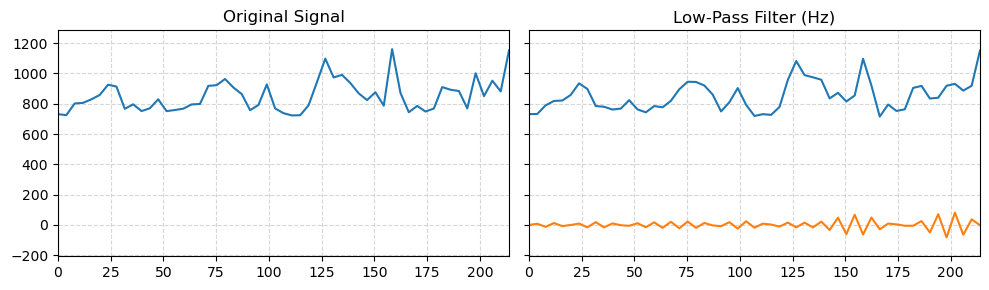

In [33]:
# Code used to display the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.plot(times, data)
ax1.set_title("Original Signal")
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')
ax2.plot(times, filtered)
ax2.plot(times, filtered-data)
ax2.set_title("Low-Pass Filter (Hz)")
ax2.grid(alpha=.5, ls='--')
plt.tight_layout()
plt.show()

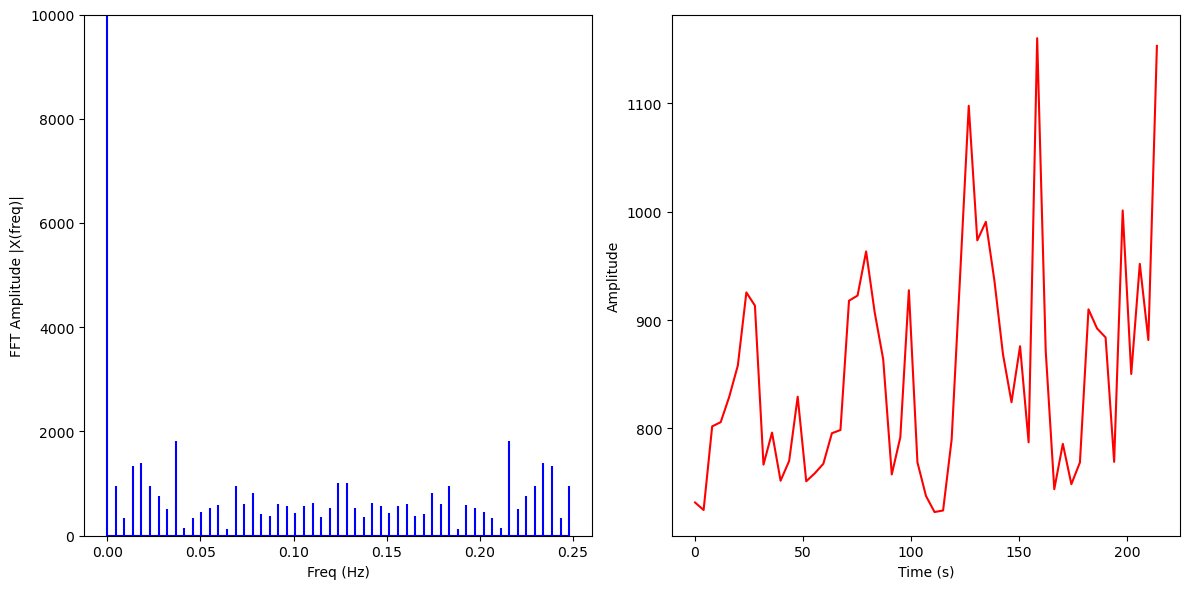

In [34]:
from numpy.fft import fft, ifft

X = fft(y)
N = len(X)
n = np.arange(N)
sr = 1/3.96
ts = 1.0/sr
T = N/sr
freq = n/T 
t = np.arange(0,N*ts,ts)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 10)
plt.ylim(0, 10000)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

/tmp/ipykernel_46003/1180526895.py:2: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1/freq, np.abs(X), 'b')


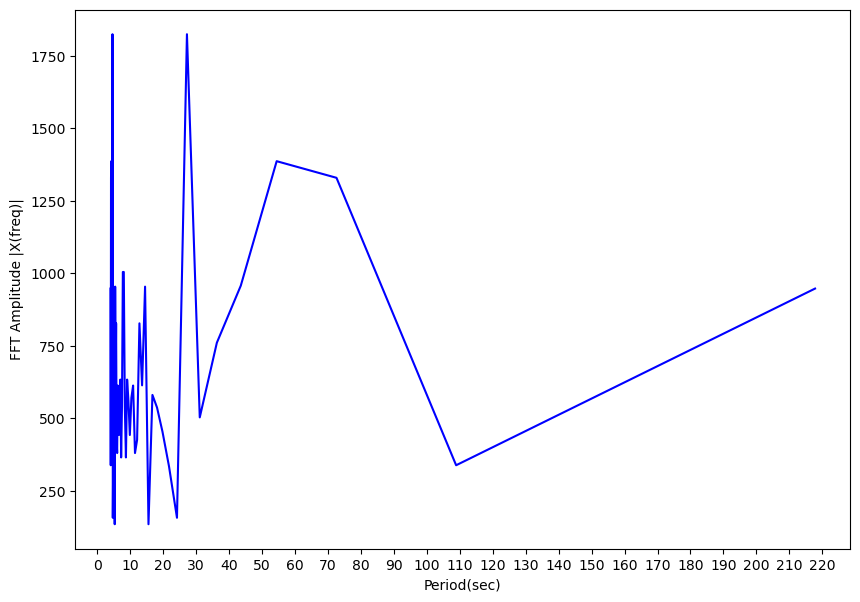

In [41]:
fig, ax = plt.subplots()
ax.plot(1/freq, np.abs(X), 'b')
# ax.hlines(1500, 0,t[-1], 'black', linestyles='dashed')
plt.xlabel('Period(sec)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 50)
# plt.ylim(0, 2000)
plt.locator_params(axis='x', nbins=30) 
fig.set_size_inches(10,7)

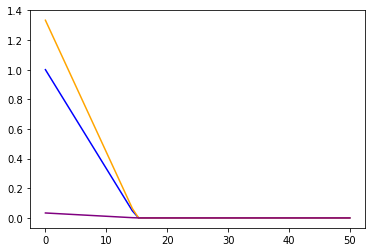

In [38]:
fig, ax = plt.subplots()
t=15
c=1/t
x = np.linspace(0,50)
ax.plot(x,
       ((t - x) / (c * t ** 2)) * np.heaviside((t - x), 0),
       color='blue')

c=0.05
ax.plot(x,
       ((t - x) / (c * t ** 2)) * np.heaviside((t - x), 0),
       color="orange")

c=2
ax.plot(x,
       ((t - x) / (c * t ** 2)) * np.heaviside((t - x), 0),
       color="purple")

# plot all track that was keep in result table

In [22]:
DELTA_T = 0.02174573
# DELTA_T = 3.96
PROTEIN_SIZE = 1200

In [23]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate', "err_t", "err_c"]
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]

f=path+files[0]
datas = read_csv_file(f)



for id_track in np.unique(datas['TRACK_ID']):
    
    (x, 
     y, 
     x_auto, 
     y_auto, 
     elongation_r, 
     translation_init_r,
     perr) = single_track_analysis(datas, 
                                                 id_track, 
                                                 delta_t = DELTA_T,
                                                 protein_size=PROTEIN_SIZE,
                                                 normalise_intensity=1,
                                                 normalize_auto=True,
                                                 mm=None,
                                                 lowpass_=False,
                                                 cutoff=100,
                                                 rtol=1e-5,
                                                 method="original",
                                                force_analysis=False)
    if elongation_r>5:
        d = pd.DataFrame.from_dict({"file_name":"DUP_15x550x05_sample1_test4-01_processed-Orthogonal Projection-529",
#             'file_name':f.split('/')[-2],
                                    'track_id':id_track,
                                    'len_track': len(x),
                                    'elongation_time':elongation_r,
                                    'init_translation_rate':translation_init_r,
                                   "err_t": perr[0], 
                                    "err_c":perr[1]},
                                   orient='index').T
        result = pd.concat([result, d], ignore_index=True)


result['tmp'] = 1
result[["track_id","len_track","elongation_time","init_translation_rate"]].mean()

to fix
original method
original method
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
original method
to fix
original method
to fix
original method
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
original method


track_id                     3214.85
len_track                      166.2
elongation_time          5225.521741
init_translation_rate    12852.17232
dtype: object

In [15]:
# result.to_csv("/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/03-Dropbox/DUP_15x550x05_sample1_test4-01_processed-Orthogonal Projection-529.csv")

In [24]:
result.sort_values("track_id")

file_name track_id len_track  \
0   DUP_15x550x05_sample1_test4-01_processed-Ortho...        7       205   
1   DUP_15x550x05_sample1_test4-01_processed-Ortho...       10       267   
2   DUP_15x550x05_sample1_test4-01_processed-Ortho...       11       118   
3   DUP_15x550x05_sample1_test4-01_processed-Ortho...       16       192   
4   DUP_15x550x05_sample1_test4-01_processed-Ortho...       19       149   
5   DUP_15x550x05_sample1_test4-01_processed-Ortho...      710       201   
6   DUP_15x550x05_sample1_test4-01_processed-Ortho...     1129       113   
7   DUP_15x550x05_sample1_test4-01_processed-Ortho...     1512       210   
8   DUP_15x550x05_sample1_test4-01_processed-Ortho...     1754       158   
9   DUP_15x550x05_sample1_test4-01_processed-Ortho...     2092       183   
10  DUP_15x550x05_sample1_test4-01_processed-Ortho...     2881       111   
11  DUP_15x550x05_sample1_test4-01_processed-Ortho...     3021       150   
12  DUP_15x550x05_sample1_test4-01_processed-Ortho...     3108       219   
13  DUP_15x550x05_sample1_test4-01_processed-Ortho...     5471       161   
14  DUP_15x550x05_sample1_test4-01_processed-Ortho...     5756       125   
15  DUP_15x550x05_sample1_test4-01_processed-Ortho...     6350       166   
16  DUP_15x550x05_sample1_test4-01_processed-Ortho...     6495       183   
17  DUP_15x550x05_sample1_test4-01_processed-Ortho...     6592        98   
18  DUP_15x550x05_sample1_test4-01_processed-Ortho...     8010       160   
19  DUP_15x550x05_sample1_test4-01_processed-Ortho...     9353       155   

   elongation_time init_translation_rate     err_t         err_c  tmp  
0       1317.24221           1563.382287  0.226613    383.676136    1  
1       633.313319            136.234798  0.213499     15.446009    1  
2      2352.270614           1851.102152  0.255902    930.985647    1  
3      1633.536754           1301.189145   0.15015    262.813027    1  
4      2851.235216           5895.043257  0.158268   2240.281541    1  
5       908.433085            360.913978  0.202492     55.020878    1  
6      3222.343394          12260.891136  0.128029   4345.821816    1  
7      1177.642082            635.007138   0.22401    138.058456    1  
8      1774.292284           1476.355128  0.200521    445.869856    1  
9      3631.574441           8956.086429   0.09585   2670.710543    1  
10    17512.731141          42888.617566  0.009803   6896.807569    1  
11     1279.169907           2245.900969  0.155632    377.148402    1  
12      979.813738            1868.91627  0.282837    433.559035    1  
13      2627.37856           4187.459428  0.102764     974.15178    1  
14     1572.530879           3471.518099   0.16012      740.7272    1  
15     9024.526272          36353.846177  0.022349   6605.605952    1  
16     2388.550443           4494.502998   0.09643    883.721965    1  
17     5384.697884           3016.322663  0.072918    1019.80237    1  
18     2179.917766           4525.005232   0.11423    948.817745    1  
19    42059.234823         119555.151556  0.005285  24326.800917    1

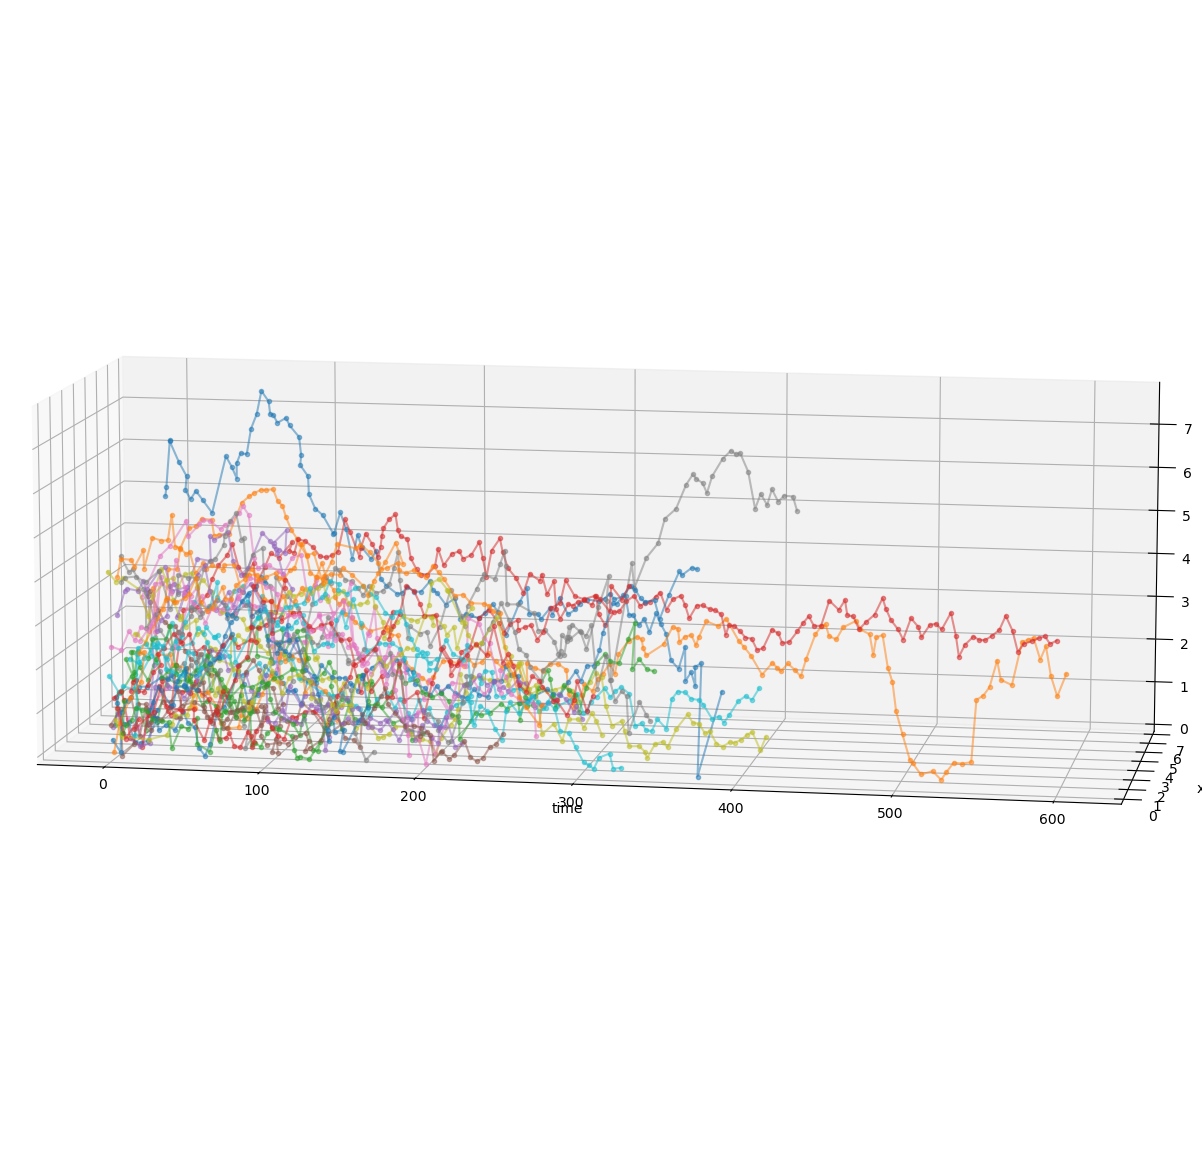

In [11]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.5, 0.5, 1]))
ax.set_box_aspect(aspect = (3,1,1))


for id_ in np.unique(result['track_id'].to_numpy()):
# for id_ in [10,710,3021,7,16,8010,5471]:
# for id_ in [9353,19,5756,2881,11,6592,2092,1512,1754,6495,3108,1129,6350]:
    x = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()))
    y = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()))
    z = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()))
    
    ax.plot(x, 
            y, 
            z, 
            '.-',
            alpha = 0.5
            )

ax.set_xlabel('time')
ax.set_ylabel('x')
ax.set_zlabel('y')
fig.set_size_inches((15, 15))

ax.view_init(elev=10., azim=-80)

original method
to fix
original method
original method
to fix
original method
to fix
original method
original method
to fix
original method
original method
to fix
original method
original method
original method
original method
original method
original method
original method
original method
original method
original method
to fix
original method


/home/u2175049/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


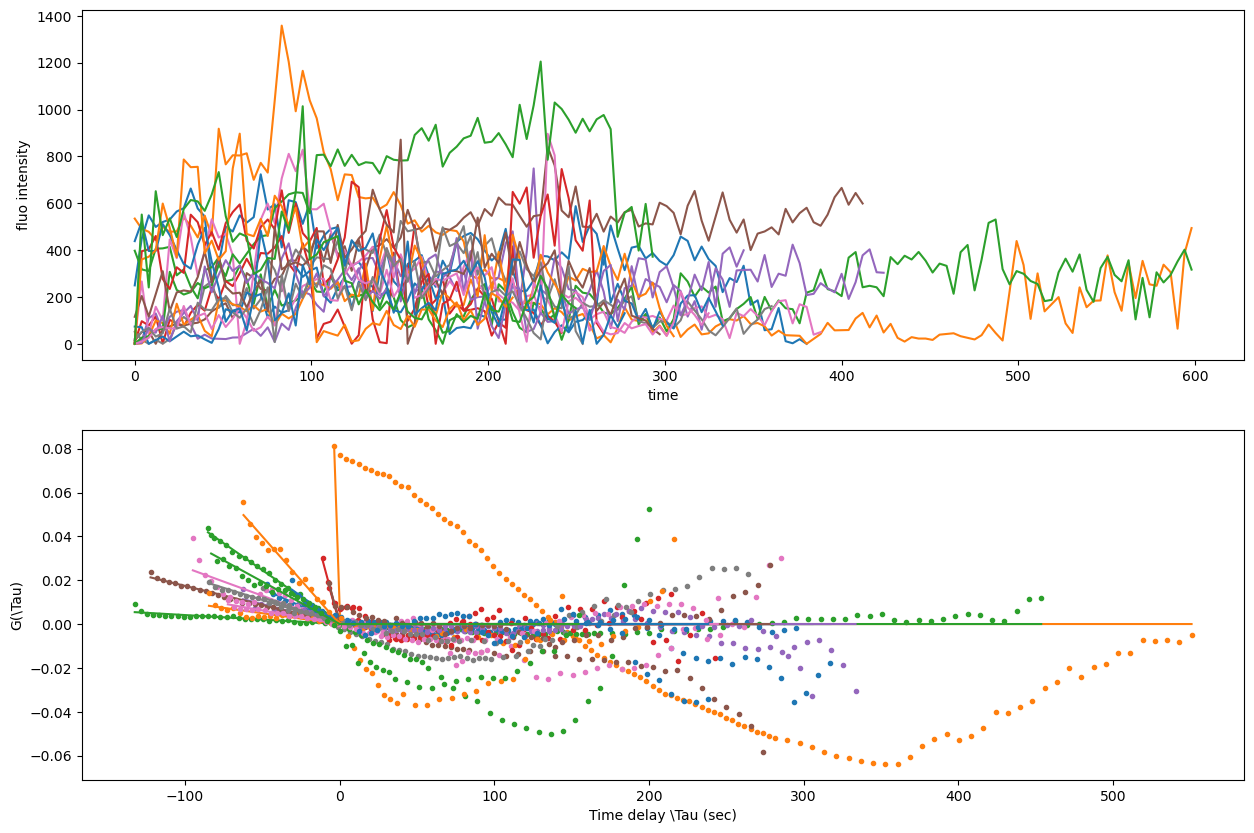

In [12]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(2,1)

colors = list(mcolors.TABLEAU_COLORS.keys())

i=0
for id_track in np.unique(result['track_id']):#[:5]:
# for id_track in [10,710,3021,7,16,8010,5471]:
# for id_track in [9353,19,5756,2881,11,6592,2092,1512,1754,6495,3108,1129,6350]:

    x = datas[datas.TRACK_ID==id_track].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_track].sort_values('FRAME')['POSITION_T'].values)
    y = datas[datas.TRACK_ID==id_track].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values-np.min(datas[datas.TRACK_ID==id_track].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values)
    
    if len(x)>50:
        ax[0].plot(x, y, color=colors[i])


        (x, 
         y, 
         x_auto, 
         y_auto, 
         elongation_r, 
         translation_init_r) = single_track_analysis(datas, 
                                                     id_track, 
                                                     delta_t = DELTA_T,
                                                     protein_size=PROTEIN_SIZE,
                                                     normalise_intensity=1,
                                                     normalize_auto=True,
                                                     mm=None,
                                                     lowpass_=False,
                                                     cutoff=100,
                                                     rtol=1e-3,
                                                     method="original"
                                                    )


        ax[1].plot(x_auto-PROTEIN_SIZE/elongation_r, 
                   y_auto, 
                   '.', 
                   color=colors[i])
        ax[1].plot(x_auto-PROTEIN_SIZE/elongation_r, 
                   fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r ), 
                   color=colors[i] )



        if i == 7:
            i=0
        else:
            i+=1

ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
# ax[1].set_ylim(-0.002, 0.002)


fig.set_size_inches((15,10))
# print(len(np.unique(result['track_id'])))

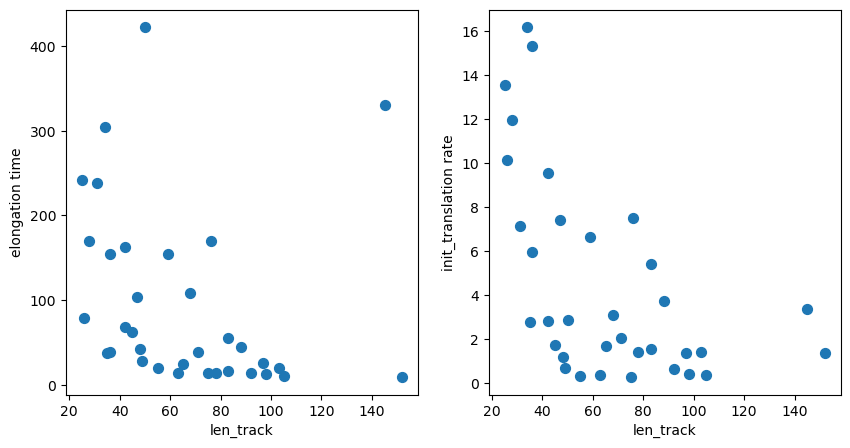

In [13]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(result['len_track'], result['elongation_time'], s=50)
ax[1].scatter(result['len_track'], result['init_translation_rate'], s=50)
ax[0].set_xlabel('len_track')
ax[0].set_ylabel('elongation time')

ax[1].set_xlabel('len_track')
ax[1].set_ylabel('init_translation rate')
fig.set_size_inches((10,5))

# Multiple file analysis

In [25]:
DELTA_T = 0.02174573
PROTEIN_SIZE = 1200

In [27]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate', "err_c", "err_t"]
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]
for f in files:
    f = path+f
    datas = read_csv_file(f)


    for id_track in np.unique(datas['TRACK_ID']): 
        (x, 
         y, 
         x_auto, 
         y_auto, 
         elongation_r, 
         translation_init_r,
         perr) = single_track_analysis(datas, 
                                                     id_track, 
                                                     delta_t = DELTA_T,
                                                     protein_size=PROTEIN_SIZE,
                                                     normalise_intensity=1,
                                                     normalize_auto=True,
                                                     mm=None,
                                                     lowpass_=False,
                                                     cutoff=100,
                                                     rtol=1e-5,
                                                     method="original",
                                                    force_analysis=False)

        
        if elongation_r>5:
            d = pd.DataFrame.from_dict({'file_name':f.split('/')[-1],
                                        'track_id':id_track,
                                        'len_track': len(x),
                                        'elongation_time':elongation_r,
                                        'init_translation_rate':translation_init_r,
                                        'init_translation_rate':translation_init_r,
                                   "err_t": perr[0], 
                                    "err_c":perr[1]},
                                       orient='index').T
            result = pd.concat([result, d], ignore_index=True)



result['tmp'] = 1
# result.drop(result[result["len_track"]<100].index, inplace=True)

to fix
original method
original method
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
original method
to fix
original method
to fix
original method
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method


In [28]:
# result.sort_values('len_track')
result

file_name track_id len_track  \
0    DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv        7       205   
1    DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       10       267   
2    DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       11       118   
3    DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       16       192   
4    DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       19       149   
..                                                 ...      ...       ...   
145  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_tra...     8351       117   
146  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_tra...     8388       113   
147  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_tra...     9193       116   
148  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_tra...     9746       112   
149  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_tra...    10073       100   

    elongation_time init_translation_rate        err_c     err_t  tmp  
0        1317.24221           1563.382287   383.676136  0.226613    1  
1        633.313319            136.234798    15.446009  0.213499    1  
2       2352.270614           1851.102152   930.985647  0.255902    1  
3       1633.536754           1301.189145   262.813027   0.15015    1  
4       2851.235216           5895.043257  2240.281541  0.158268    1  
..              ...                   ...          ...       ...  ...  
145     2040.674423           1452.476147   236.143092   0.09331    1  
146     1003.350812           2437.363685  1177.003736  0.585206    1  
147      8438.89104           2994.762593  1116.157323  0.053371    1  
148     7209.024606           9351.532459  1396.917395  0.025486    1  
149      3856.98747            948.563277   238.458593   0.07679    1  

[150 rows x 8 columns]

In [29]:
result.to_csv("/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/02-Pierre/analysis.csv")

track_id                  4032.125000
len_track                  150.625000
elongation_time          19482.804586
init_translation_rate    58660.438013
tmp                          1.000000
dtype: float64


/tmp/ipykernel_366698/2862878632.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(result.mean())


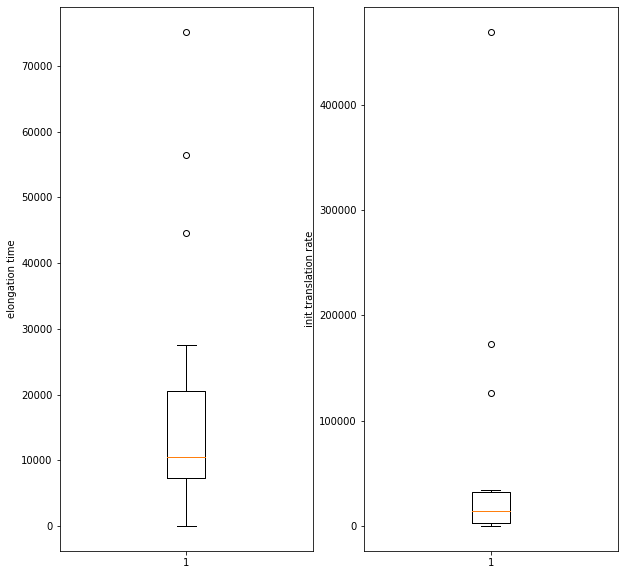

In [195]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(result['elongation_time'])
ax[1].boxplot(result['init_translation_rate'])
ax[0].set_ylabel('elongation time')
ax[1].set_ylabel('init translation rate')
fig.set_size_inches((10,10))
print(result.mean())

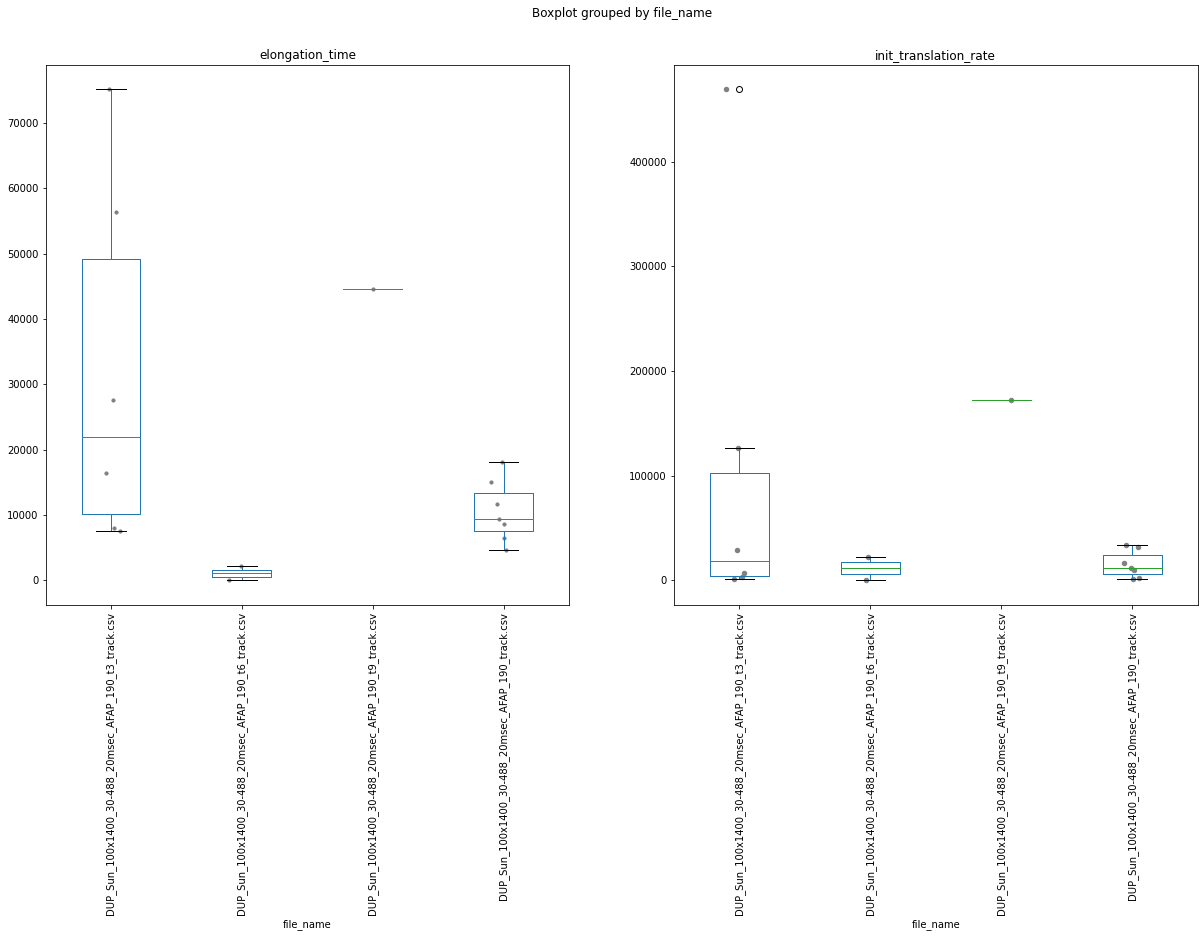

In [196]:
# result['elongation_time'] = pd.to_numeric(result['elongation_time'])
fig, ax = plt.subplots(1,2)
result.boxplot(['elongation_time'] , 
               by='file_name', 
               grid=False, 
               ax = ax[0],
               rot=90, 
              )

result.boxplot([ 'init_translation_rate'] , 
               by='file_name', 
               grid=False, 
               ax = ax[1],
               rot=90
               )

group = 'file_name'
column = 'elongation_time'
grouped = result.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
    
group = 'file_name'
column = 'init_translation_rate'
grouped = result.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)
    
# ax[1].set_ylim(0,250)
fig.set_size_inches((20,10))

In [197]:
result.groupby(by='file_name')[['len_track','elongation_time', 'init_translation_rate']].mean()

len_track  \
file_name                                                        
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_trac...  122.666667   
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t6_trac...  114.500000   
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_trac...  109.000000   
DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv   190.857143   

                                                    elongation_time  \
file_name                                                             
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_trac...     31851.439123   
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t6_trac...      1067.004762   
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_trac...     44568.529603   
DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv      10559.099929   

                                                    init_translation_rate  
file_name                                                                  
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_trac...          105996.340208  
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t6_trac...           11317.624959  
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_trac...          172373.790806  
DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv            15368.560890

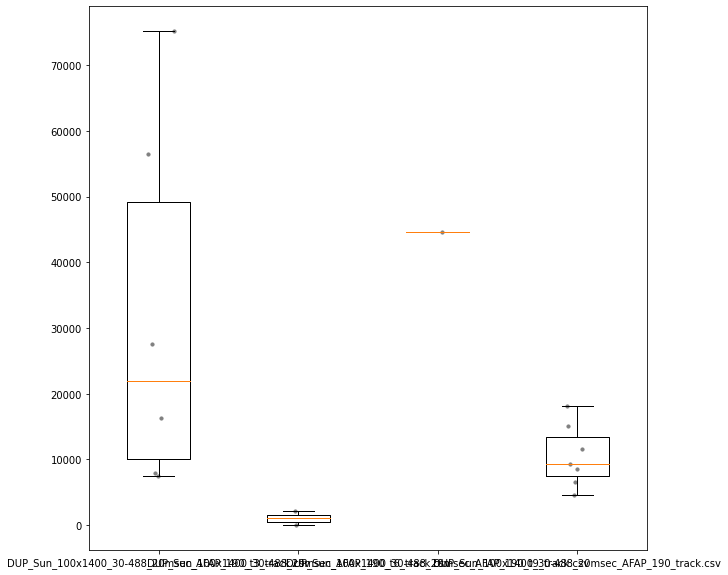

In [198]:
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# initialize dataframe
# n = 200
# ngroup = 3
# df = pd.DataFrame({'data': np.random.rand(n), 'group': map(np.floor, np.random.rand(n) * ngroup)})
fig, ax = plt.subplots()

group = 'file_name'
column = 'elongation_time'
grouped = result.groupby(group)

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

ax.boxplot(vals, labels=names, )
ngroup = len(vals)



for x, val, clevel in zip(xs, vals, clevels):
    ax.scatter(x, val, c='grey', alpha=1, s=10)
    
ax.grid(False)
fig.set_size_inches((10,10))

In [199]:
result[["file_name", 'len_track','elongation_time', 'init_translation_rate']]

file_name len_track  \
0   DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       205   
1   DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       267   
2   DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       192   
3   DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       201   
4   DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       150   
5   DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       161   
6   DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv       160   
7   DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_tra...       122   
8   DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_tra...       164   
9   DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_tra...       159   
10  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_tra...        95   
11  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_tra...        94   
12  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_tra...       102   
13  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t6_tra...       109   
14  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t6_tra...       120   
15  DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_tra...       109   

   elongation_time init_translation_rate  
0       9318.07351          11914.330514  
1      4580.418322            989.748806  
2     11648.633438           9614.170446  
3      6529.842023           2621.069846  
4      8592.012892          16662.326354  
5     18147.536132          31855.077786  
6     15097.183184          33923.202475  
7     27602.012523           7137.752191  
8      7521.844156            726.496959  
9      8002.205743           3564.989263  
10    56417.627492         126515.970917  
11    75183.115827          468969.85653  
12    16381.828998          29062.975389  
13        5.759255             26.696124  
14      2128.25027          22608.553795  
15    44568.529603         172373.790806

In [200]:
result[["file_name", 'len_track','elongation_time', 'init_translation_rate']].mean()

/tmp/ipykernel_366698/1952775797.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result[["file_name", 'len_track','elongation_time', 'init_translation_rate']].mean()


len_track                  150.625000
elongation_time          19482.804586
init_translation_rate    58660.438013
dtype: float64

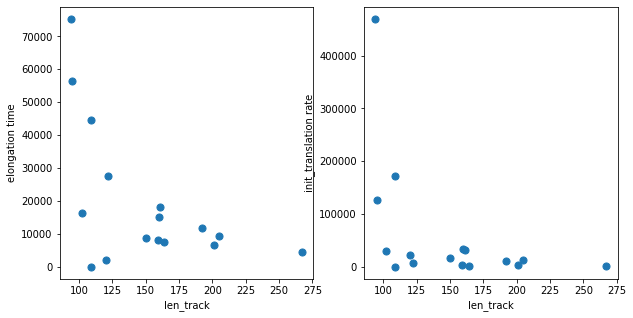

In [201]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(result['len_track'], result['elongation_time'], s=50)
ax[1].scatter(result['len_track'], result['init_translation_rate'], s=50)
ax[0].set_xlabel('len_track')
ax[0].set_ylabel('elongation time')

ax[1].set_xlabel('len_track')
ax[1].set_ylabel('init_translation rate')
fig.set_size_inches((10,5))

In [202]:
result["len_track"]*DELTA_T

0     0.615
1     0.801
2     0.576
3     0.603
4      0.45
5     0.483
6      0.48
7     0.366
8     0.492
9     0.477
10    0.285
11    0.282
12    0.306
13    0.327
14     0.36
15    0.327
Name: len_track, dtype: object